## Capstone #1

<div class="span5 alert alert-info">

### *File Descriptions*


* DATA_ELEMENT_DESCRIPTION.csv defines each data element and indicates where its description is found in Data Sources, Definitions, and Notes.
* DEFINED_DATA_VALUE.csv defines the meaning of specific values (such as missing or suppressed data). 
* DEMOGRAPHICS.csv identifies the data elements and values in the Demographics indicator domain.
* HEALTHY_PEOPLE_2010.csv identifies the Healthy People 2010 Targets and the U.S. Percentages or Rates.
* LEADING_CAUSES_OF_DEATH.csv identifies the data elements and values in the Leading Causes of Death indicator domain.
* MEASURES_OF_BIRTH_AND_DEATH.csv identifies the data elements and values in the Measures of Birth and Death indicator domain.
* PREVENTIVE_SERVICES_USE.csv identifies the data elements and values in the Preventive Services indicator domain.
* RELATIVE_HEALTH_IMPORTANCE.csv identifies the data elements and values in the Relative Health Importance indicator domain.
* RISK_FACTORS_AND_ACCESS_TO_CARE.csv identifies the data elements and values in the Risk Factors and Access to Care indicator domain.
* SUMMARY_MEASURES_OF_HEALTH.csv identifies the data elements and values in the Summary Measures of Health indicator domain.
* VULNERABLE_POPS_AND_ENV_HEALTH.csv identifies the data elements and values in the Vulnerable Populations and Environmental Health indicator domain.


    
Data source can be found [here](https://healthdata.gov/dataset/community-health-status-indicators-chsi-combat-obesity-heart-disease-and-cancer/resource)



In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.pyplot import figaspect
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import seaborn as sns
from scipy.stats.stats import pearsonr
mpl.rcParams.update({'font.size': 14})


In [2]:
#Reading all 11 csv files
files = sorted(glob.glob('../CHSI_dataset/*.csv'))  

### *File Initialization*

In [3]:
DATA_ELEMENT_DESCRIPTION = pd.read_csv(files[0])
DEFINED_DATA_VALUE = pd.read_csv(files[1])
DEMOGRAPHICS = pd.read_csv(files[2])
HEALTHY_PEOPLE_2010 = pd.read_csv(files[3])
LEADING_CAUSES_OF_DEATH = pd.read_csv(files[4])
MEASURES_OF_BIRTH_AND_DEATH = pd.read_csv(files[5])
PREVENTIVE_SERVICES_USE = pd.read_csv(files[6])
RELATIVE_HEALTH_IMPORTANCE = pd.read_csv(files[7])
RISK_FACTORS_AND_ACCESS_TO_CARE = pd.read_csv(files[8])
SUMMARY_MEASURES_OF_HEALTH = pd.read_csv(files[9])
VULNERABLE_POPS_AND_ENV_HEALTH = pd.read_csv(files[10])

In [4]:
#Auxiliary files 
DATA_ELEMENT_DESCRIPTION
DEFINED_DATA_VALUE
HEALTHY_PEOPLE_2010

Categories                             Elements  \
0     Birth Measures              Low Birth Wt. (<2500 g)   
1     Birth Measures         Very Low Birth Wt. (<1500 g)   
2     Birth Measures         Premature Births (<37 weeks)   
3     Birth Measures             Births to Women under 18   
4     Birth Measures              Births to Women over 40   
5     Birth Measures            Births to Unmarried Women   
6     Birth Measures           No Care in First Trimester   
7   Infant Mortality                     Infant Mortality   
8   Infant Mortality  White non Hispanic Infant Mortality   
9   Infant Mortality  Black non Hispanic Infant Mortality   
10  Infant Mortality            Hispanic Infant Mortality   
11  Infant Mortality            Neonatal Infant Mortality   
12  Infant Mortality       Post-neonatal Infant Mortality   
13    Death Measures               Breast Cancer (Female)   
14    Death Measures                         Colon Cancer   
15    Death Measures               Coronary Heart Disease   
16    Death Measures                             Homicide   
17    Death Measures                          Lung Cancer   
18    Death Measures               Motor Vehicle Injuries   
19    Death Measures                               Stroke   
20    Death Measures                              Suicide   
21    Death Measures                 Unintentional Injury   

    US_Pct_or_Rate_2003  Healthy_People_2010_Target  
0                   7.9                         5.0  
1                   1.4                         0.9  
2                  12.3                         7.6  
3                   3.4                     -9998.9  
4                   2.6                     -9998.9  
5                  34.6                     -9998.9  
6                  16.0                        10.0  
7                   6.8                         4.5  
8                   5.7                         4.5  
9                  13.6                         4.5  
10                  5.6                         4.5  
11                  4.6                         2.9  
12                  2.2                         1.2  
13                 25.3                        21.3  
14                 19.1                        13.7  
15                172.0                       162.0  
16                  6.0                         2.8  
17                 54.1                        43.3  
18                 14.8                         8.0  
19                 53.0                        50.0  
20                 10.8                         4.8  
21                 37.3                        17.1

In [5]:
LEADING_CAUSES_OF_DEATH.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0                1                 1          Autauga         Alabama   
1                1                 3          Baldwin         Alabama   
2                1                 5          Barbour         Alabama   
3                1                 7             Bibb         Alabama   
4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  A_Wh_Comp  CI_Min_A_Wh_Comp  \
0              AL                29      -1111             -1111   
1              AL                16         57                39   
2              AL                51      -1111             -1111   
3              AL                42      -1111             -1111   
4              AL                28         34                17   

   CI_Max_A_Wh_Comp  A_Bl_Comp  ...  F_Bl_Cancer  CI_Min_F_Bl_Cancer  \
0             -1111      -1111  ...           19                  14   
1                75      -1111  ...           20                  15   
2             -1111      -1111  ...           26                  22   
3             -1111      -1111  ...           20                  14   
4                52      -1111  ...           28                  10   

   CI_Max_F_Bl_Cancer  F_Ot_Cancer  CI_Min_F_Ot_Cancer  CI_Max_F_Ot_Cancer  \
0                  23        -1111               -1111               -1111   
1                  25        -1111               -1111               -1111   
2                  31        -1111               -1111               -1111   
3                  25        -1111               -1111               -1111   
4                  46        -1111               -1111               -1111   

   F_Hi_Cancer  CI_Min_F_Hi_Cancer  CI_Max_F_Hi_Cancer  LCD_Time_Span  
0        -1111               -1111               -1111      1999-2003  
1        -1111               -1111               -1111      2001-2003  
2        -1111               -1111               -1111      1999-2003  
3        -1111               -1111               -1111      1994-2003  
4        -1111               -1111               -1111      1999-2003  

[5 rows x 235 columns]

In [6]:
#Outlier column name
DATA_ELEMENT_DESCRIPTION.update(
    DATA_ELEMENT_DESCRIPTION.replace('C_Ot_homicide','C_Ot_Homicide'))
LEADING_CAUSES_OF_DEATH.rename(columns={'C_Ot_homicide':'C_Ot_Homicide'}, inplace=True)

#Functions to describe acronyms
def description(param):
    if param in list(DATA_ELEMENT_DESCRIPTION.COLUMN_NAME):
        description_value = DATA_ELEMENT_DESCRIPTION[DATA_ELEMENT_DESCRIPTION.
                                     COLUMN_NAME==param].DESCRIPTION.tolist()[0]
    else:
        description_value = ''   
    return description_value

def short_description(param):
    list_of_removing = ['County data,', 'death measures,', 'birth measures,', ',']
    result = description(param)
    for i in list_of_removing:
        if result.__contains__(i):
            result = result.replace(i,'')
    return result

def short_race_description(param):
    list_of_removing = ['Black', 'Hispanic','White', 'other', 
                        'County data,', 'death measures,', 'birth measures,', ',']
    result = description(param)
    for i in list_of_removing:
        if result.__contains__(i):
            result = result.replace(i,'')
    return result

In [7]:
#Common columns in all worksheets
county_info = ['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
               'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number']


In [8]:
#Joining files
worksheets = [DEMOGRAPHICS,
LEADING_CAUSES_OF_DEATH,
MEASURES_OF_BIRTH_AND_DEATH, 
PREVENTIVE_SERVICES_USE,
RELATIVE_HEALTH_IMPORTANCE,
RISK_FACTORS_AND_ACCESS_TO_CARE,
SUMMARY_MEASURES_OF_HEALTH,
VULNERABLE_POPS_AND_ENV_HEALTH]


In [9]:
#Replacing not available/reported data by zeros
nan_values = [-1111, -1111.1, -1, -9999, -2222, -2222.2, -2]
for worksheet in worksheets:
    nda =[]
    for i,nan_value in enumerate(nan_values):
        nda.append(worksheet.loc[:,:]!=nan_value)
        worksheet.update(worksheet.where(nda[i]).fillna(0))        

In [10]:
#Time dependent data should be identified and normalized
time_dependent_worksheets = [LEADING_CAUSES_OF_DEATH,
MEASURES_OF_BIRTH_AND_DEATH,
PREVENTIVE_SERVICES_USE,
VULNERABLE_POPS_AND_ENV_HEALTH]


time_spans = ['1994-2003', '1999-2003', '2001-2003']
time_span_convert = [7,4,2]
for worksheet in time_dependent_worksheets:
    for i in list(worksheet.columns):
        if i.__contains__('Time_Span'):
            worksheet[i].replace(time_spans, time_span_convert, inplace=True)
            worksheet.rename(columns={i: 'Time'}, inplace=True)

for worksheet in time_dependent_worksheets:
    for i in list(worksheet.columns):
        if worksheet.columns.get_loc(i) < worksheet.columns.get_loc('Time') and i not in county_info:
            worksheet[i]=worksheet[i]/worksheet['Time']
          

In [11]:
#Merging all clean data files
df = worksheets[0]
for name in worksheets[1:]:
    df = df.merge(name, on=county_info.append('Time'), how='outer', sort=True).fillna(0)    

In [12]:
df.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0                1                 1          Autauga         Alabama   
1                1                 3          Baldwin         Alabama   
2                1                 5          Barbour         Alabama   
3                1                 7             Bibb         Alabama   
4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  \
0              AL                29   
1              AL                16   
2              AL                51   
3              AL                42   
4              AL                28   

                          Strata_Determining_Factors  Number_Counties  \
0     frontier status, population size, poverty, age               37   
1     frontier status, population size, poverty, age               27   
2  frontier status, population size, poverty, age...               33   
3     frontier status, population size, poverty, age               53   
4     frontier status, population size, poverty, age               39   

   Population_Size  Min_Population_Size  ...   Shig_Rpt  Shig_Rpt_Ind  \
0            48612                28447  ...   1.000000      0.750000   
1           162586               118395  ...  20.500000      2.000000   
2            28414                27269  ...   0.250000      0.750000   
3            21516                 8134  ...   0.428571      0.428571   
4            55725                29009  ...   2.750000      1.000000   

   Shig_Exp     Toxic_Chem  Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  \
0  2.750000  720799.250000             0.250000              0.250000   
1  6.500000   17832.000000             0.500000              0.500000   
2  4.000000   12468.500000             0.250000              0.250000   
3  2.285714    1043.142857             0.142857              0.142857   
4  1.250000  222255.000000             0.250000              0.250000   

   Sulfur_Dioxide_Ind  Ozone_Ind  Particulate_Matter_Ind  Lead_Ind  
0            0.250000   0.250000                0.250000  0.250000  
1            0.500000   1.000000                0.500000  0.500000  
2            0.250000   0.250000                0.250000  0.250000  
3            0.142857   0.142857                0.142857  0.142857  
4            0.250000   0.250000                0.250000  0.250000  

[5 rows x 533 columns]

<div class="span5 alert alert-info">

### *Redundant columns*

In [13]:
observation = list(df.columns)
description_list = [description(i) for i in observation]
def observ_keyword(variable):
    results = []
    for i, j in enumerate(description_list):
        if variable in str(j):
            results.append(observation[i])
    return results

In [14]:
filter_percentile = list(description(i) for i in list(observ_keyword('percentile')))
filter_CI = list(description(i) for i in list(observ_keyword('Confidence interval'))) 
filter_fav = list(description(i) for i in list(observ_keyword('Favorable indicator')))

filters = list(observ_keyword('Favorable indicator') 
               + observ_keyword('Confidence interval') 
               + observ_keyword('percentile'))
df = df.drop(columns=filters)

In [15]:
#Neutral columns
for i in list(df.columns):
    if len(np.unique(df[i]))==1 and i!='D_Ot_HIV':
        df=df.drop(columns=i)
df.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0                1                 1          Autauga         Alabama   
1                1                 3          Baldwin         Alabama   
2                1                 5          Barbour         Alabama   
3                1                 7             Bibb         Alabama   
4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  \
0              AL                29   
1              AL                16   
2              AL                51   
3              AL                42   
4              AL                28   

                          Strata_Determining_Factors  Number_Counties  \
0     frontier status, population size, poverty, age               37   
1     frontier status, population size, poverty, age               27   
2  frontier status, population size, poverty, age...               33   
3     frontier status, population size, poverty, age               53   
4     frontier status, population size, poverty, age               39   

   Population_Size  Population_Density  ...   Salm_Exp   Shig_Rpt  Shig_Exp  \
0            48612                82.0  ...   7.750000   1.000000  2.750000   
1           162586               102.0  ...  33.500000  20.500000  6.500000   
2            28414                32.0  ...   7.250000   0.250000  4.000000   
3            21516                35.0  ...   4.571429   0.428571  2.285714   
4            55725                86.0  ...   7.750000   2.750000  1.250000   

      Toxic_Chem  Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  \
0  720799.250000             0.250000              0.250000   
1   17832.000000             0.500000              0.500000   
2   12468.500000             0.250000              0.250000   
3    1043.142857             0.142857              0.142857   
4  222255.000000             0.250000              0.250000   

   Sulfur_Dioxide_Ind  Ozone_Ind  Particulate_Matter_Ind  Lead_Ind  
0            0.250000   0.250000                0.250000  0.250000  
1            0.500000   1.000000                0.500000  0.500000  
2            0.250000   0.250000                0.250000  0.250000  
3            0.142857   0.142857                0.142857  0.142857  
4            0.250000   0.250000                0.250000  0.250000  

[5 rows x 198 columns]

In [16]:
df.describe().transpose()

count          mean            std        min  \
State_FIPS_Code         3141.0     30.304680      15.134423   1.000000   
County_FIPS_Code        3141.0    103.716651     107.999484   1.000000   
Strata_ID_Number        3141.0     44.696275      25.118434   1.000000   
Number_Counties         3141.0     38.486151      10.290195  15.000000   
Population_Size         3141.0  94368.164279  306431.655763  62.000000   
...                        ...           ...            ...        ...   
Nitrogen_Dioxide_Ind    3141.0      0.235275       0.125723   0.142857   
Sulfur_Dioxide_Ind      3141.0      0.235275       0.125723   0.142857   
Ozone_Ind               3141.0      0.263565       0.202474   0.142857   
Particulate_Matter_Ind  3141.0      0.237595       0.134062   0.142857   
Lead_Ind                3141.0      0.235435       0.126373   0.142857   

                                 25%           50%       75%        max  
State_FIPS_Code            18.000000     29.000000     45.00       56.0  
County_FIPS_Code           35.000000     79.000000    133.00      840.0  
Strata_ID_Number           23.000000     44.000000     66.00       88.0  
Number_Counties            32.000000     37.000000     45.00       62.0  
Population_Size         11211.000000  25235.000000  64040.00  9935475.0  
...                              ...           ...       ...        ...  
Nitrogen_Dioxide_Ind        0.142857      0.142857      0.25        0.5  
Sulfur_Dioxide_Ind          0.142857      0.142857      0.25        0.5  
Ozone_Ind                   0.142857      0.142857      0.25        1.0  
Particulate_Matter_Ind      0.142857      0.142857      0.25        1.0  
Lead_Ind                    0.142857      0.142857      0.25        1.0  

[194 rows x 8 columns]

<div class="span5 alert alert-info">
    
### *Demographic Map*
    
To visualize the health indices throughout the country, I merge the map shapefile and data to us_merge dataframes. Because Alaska and Hawaii are further away and out of proportion I merged them separately. US_plot function creates the US map with any numeric variables in the data --default color is blue.

In [17]:
us_map = gpd.read_file('../US-map/UScounties.shp')
us_map_land = us_map[ (us_map['STATE_NAME']!='Alaska') 
                     &(us_map['STATE_NAME']!='Hawaii')]
us_map_Alaska = us_map[us_map['STATE_NAME']=='Alaska']
us_map_Hawaii = us_map[us_map['STATE_NAME']=='Hawaii']

#Merging map and data:
df_land = us_map_land.set_index('NAME').join(df.set_index('CHSI_County_Name'))
df_Alaska = us_map_Alaska.set_index('NAME').join(df.set_index('CHSI_County_Name'))
df_Hawaii = us_map_Hawaii.set_index('NAME').join(df.set_index('CHSI_County_Name'))

In [18]:
def min_max_col(variable):
    minimum = min(df_land[variable].min(), 
              df_Alaska[variable].min(), df_Hawaii[variable].min())
    maximum = max(df_land[variable].max(), 
              df_Alaska[variable].max(), df_Hawaii[variable].max())
    return minimum, maximum

def US_plot(variable, color='Blues'):
    h, w = figaspect(1.)
    mn, mx = min_max_col(variable)
    fig, ax1 = plt.subplots(1, figsize=(w*10, h*10))
    ax1.axis('off')
    ax1.set_title(description(variable), fontsize=40)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cax.tick_params(labelsize=25)
    df_land.plot(column=variable, cmap=color,
                        linewidth=0.8, ax=ax1,
                        edgecolor='0.8', vmin=mn ,vmax=mx,
                        legend=True, cax=cax)

    
    left, bottom, width, height = [0.15, 0.22, 0.24, 0.3] 
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.axis('off')
    ax2.set_title('Alaska', fontsize=25)
    df_Alaska.plot(column=variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax2, edgecolor='0.6')
    
    left, bottom, width, height = [0.35, 0.3, 0.2, 0.05]
    ax3 = fig.add_axes([left, bottom, width, height])
    ax3.axis('off')
    ax3.set_title('Hawaii', fontsize=25)
    df_Hawaii.plot(column =variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax3, edgecolor='0.6')

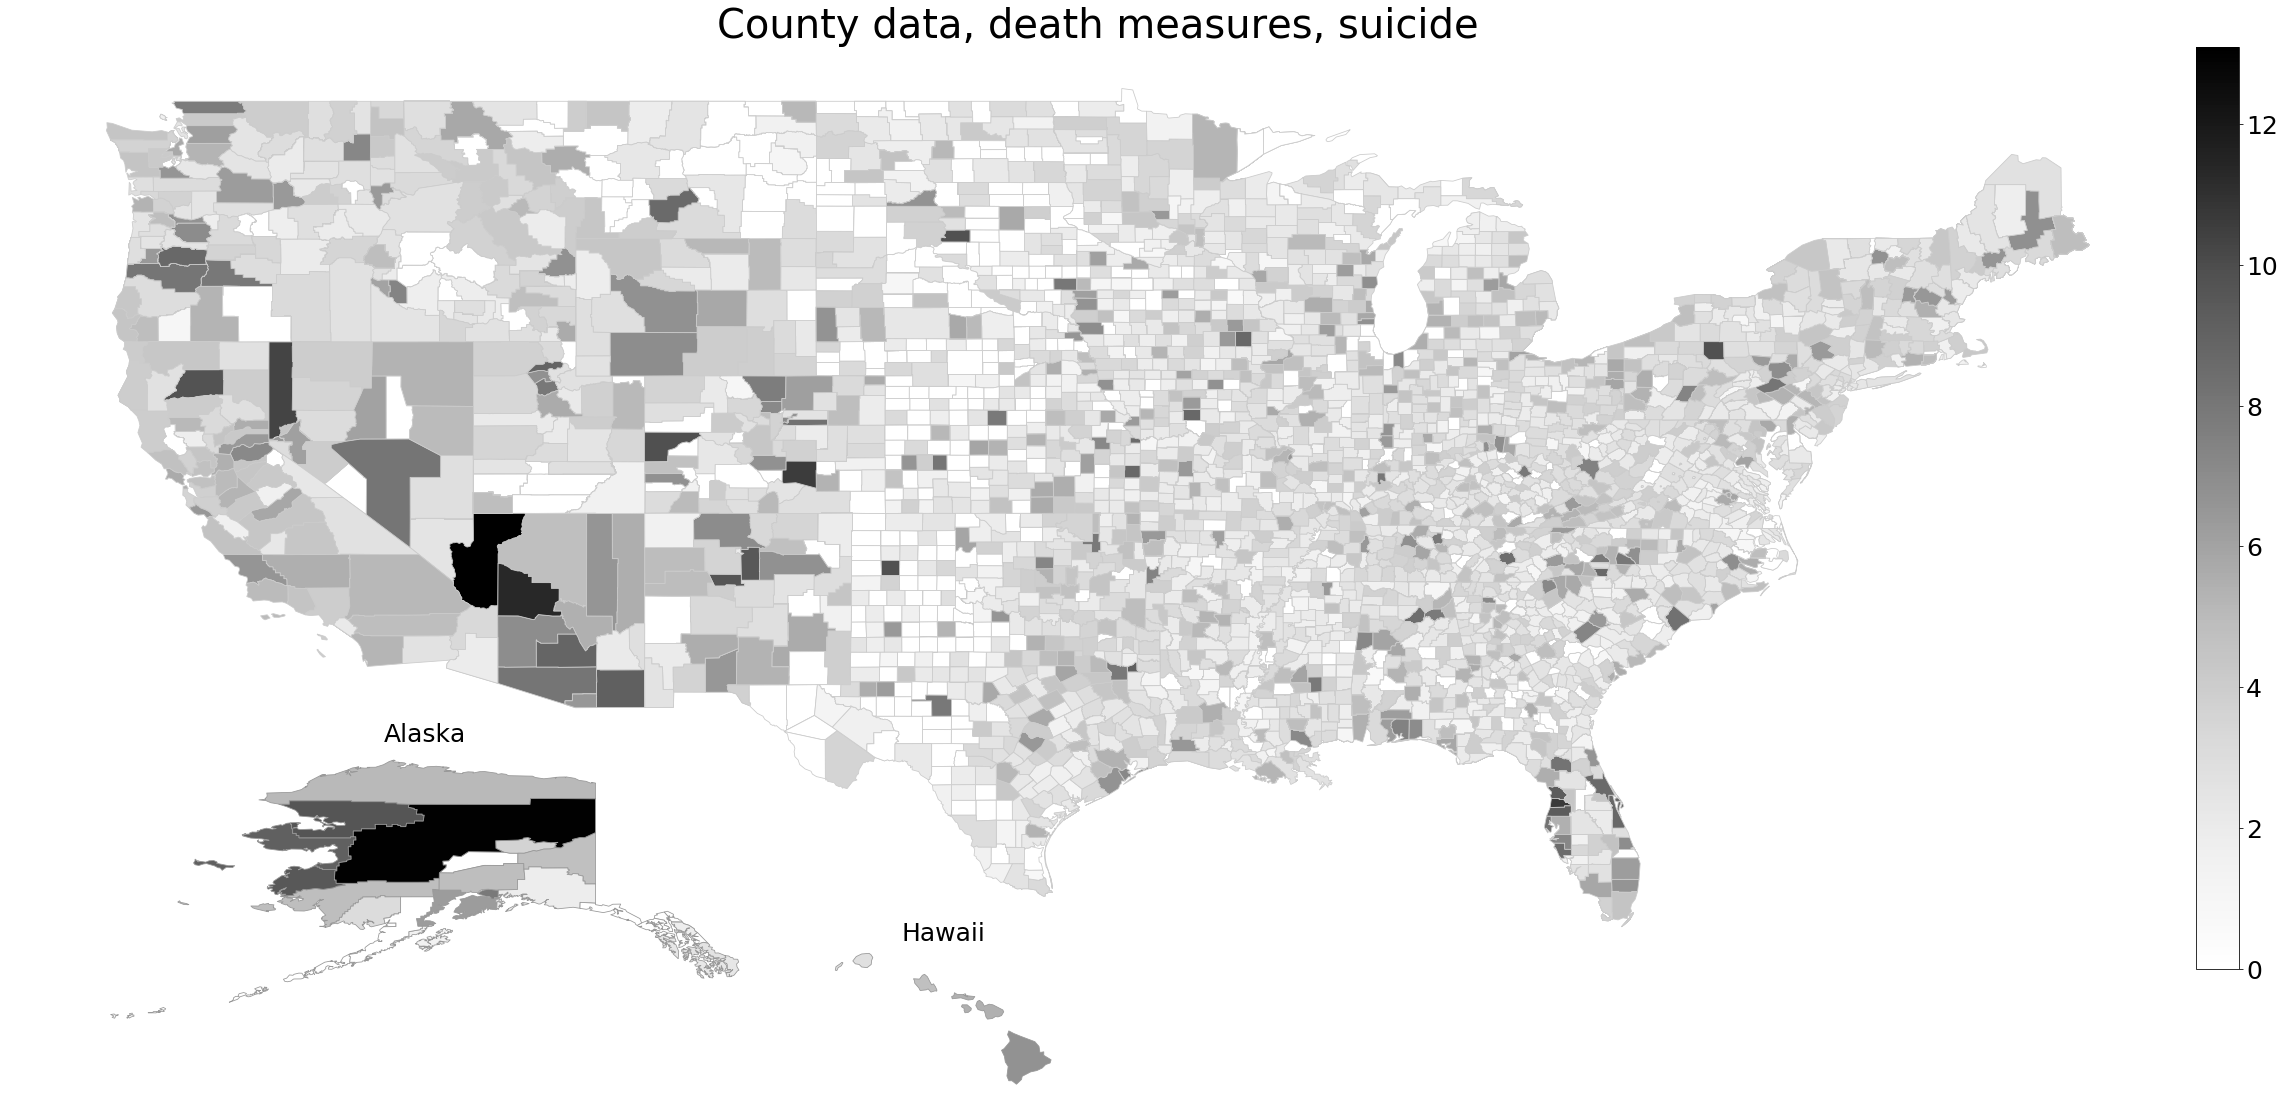

In [19]:
US_plot('Suicide', 'Greys')

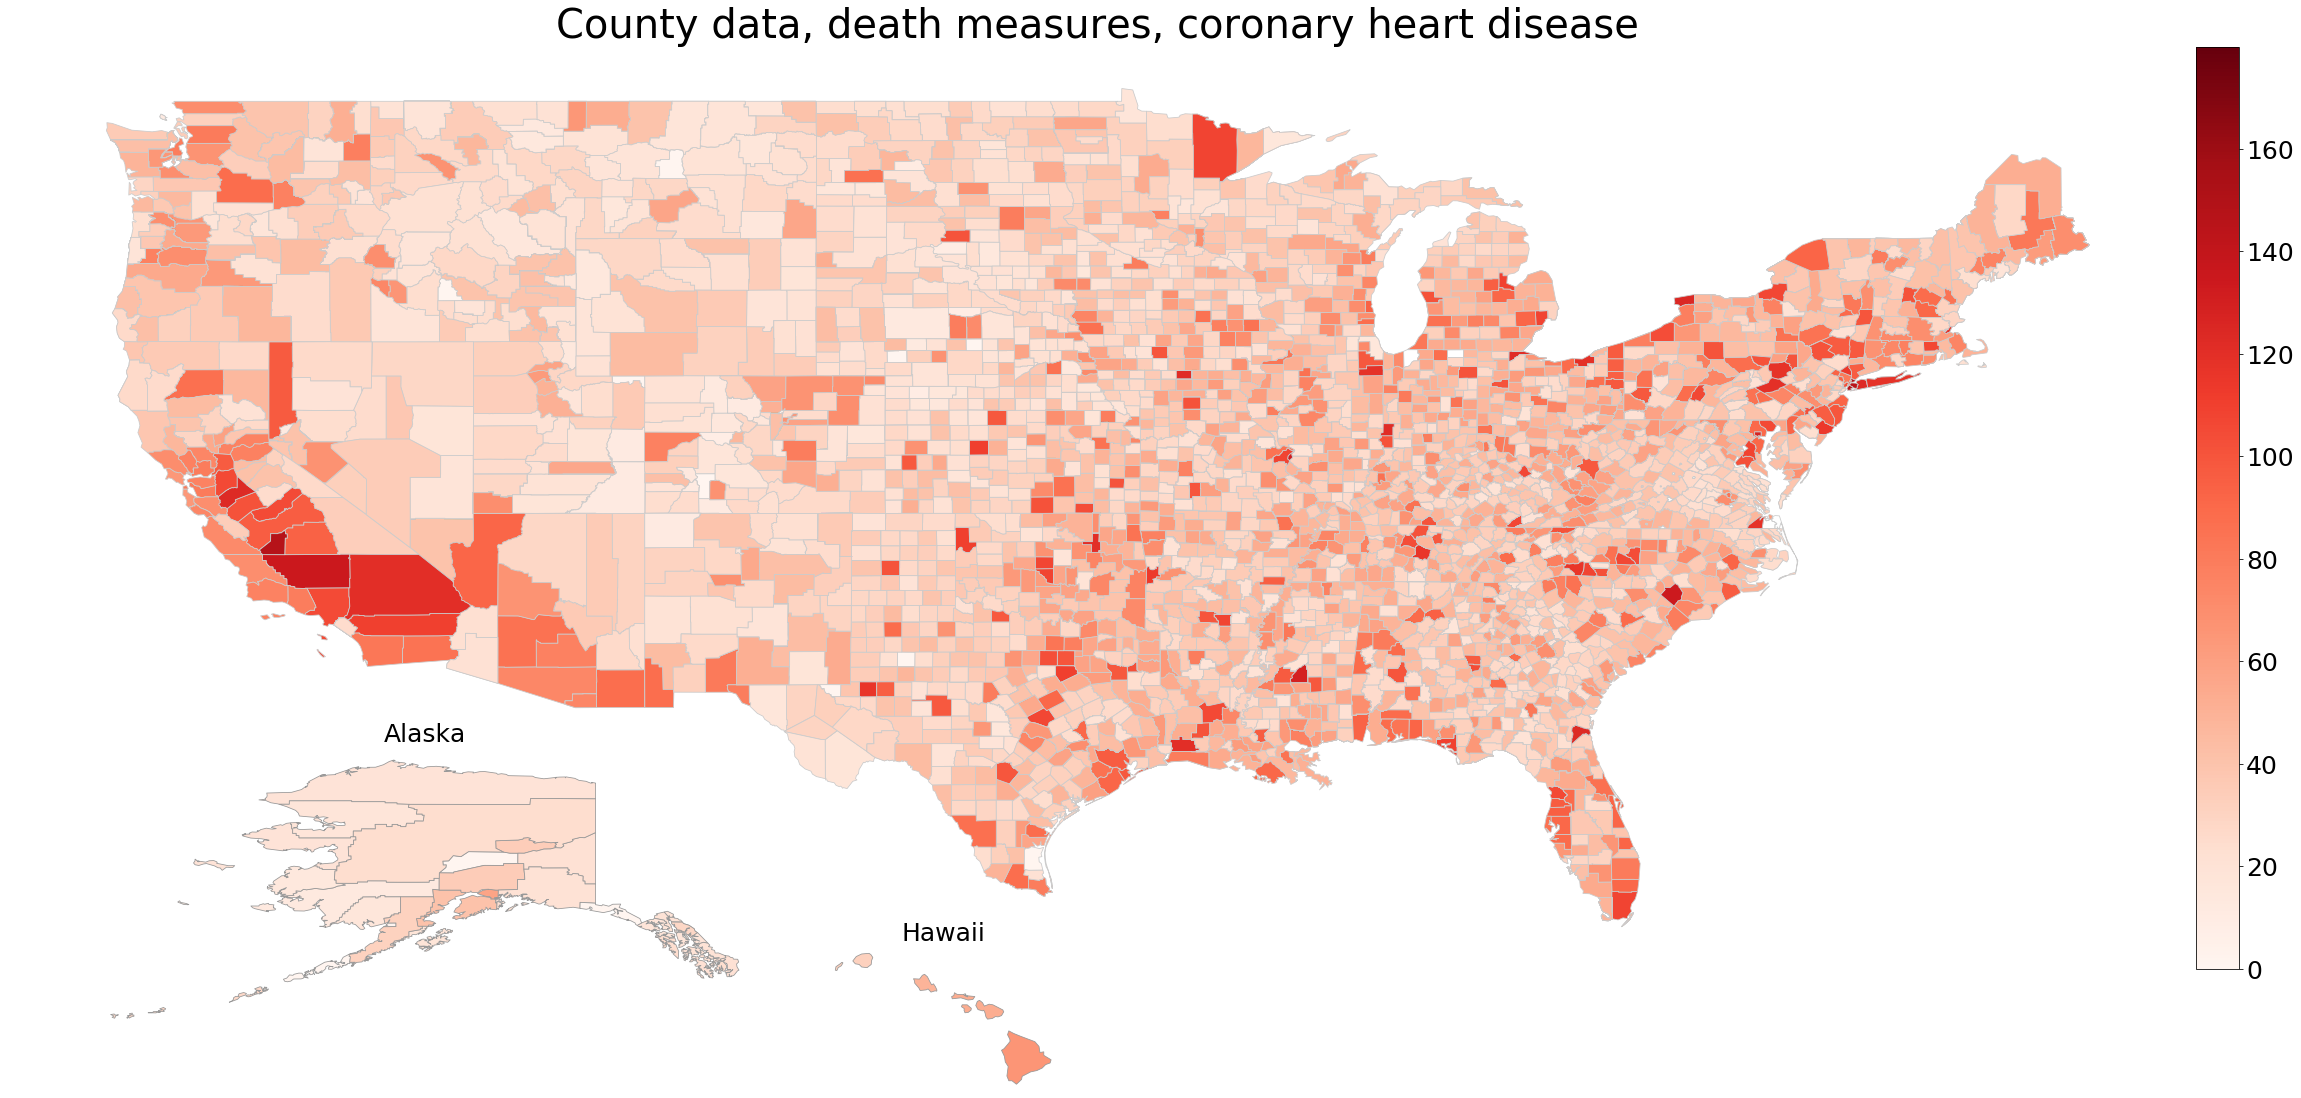

In [20]:
US_plot('CHD', 'Reds')

<div class="span5 alert alert-info">
    
### *Measures of Birth and Death*


In [21]:
Birth_Death_list = list(np.intersect1d(df.columns, MEASURES_OF_BIRTH_AND_DEATH.columns))
Birth = []
Death = []
for i in Birth_Death_list:
    if i not in county_info:
        if description(i).__contains__('birth'):
            Birth.append(i)
        else:
            Death.append(i)

In [50]:
Death_Mean = {'Cause_of_Death':Death, 'Mean_Death':[np.mean(df[i]) for i in Death]}
Birth_Mean = {'Birth':Birth, 'Mean_Birth':[np.mean(df[i]) for i in Birth]}

df_death_mean = pd.DataFrame(Death_Mean)
df_death_mean = df_death_mean.drop(df_death_mean[df_death_mean['Cause_of_Death'] =='Total_Deaths'].index, axis=0)
df_death_mean = df_death_mean.sort_values(by=['Mean_Death'], ascending=False)

df_birth_mean = pd.DataFrame(Birth_Mean)
df_birth_mean = df_birth_mean.drop(df_birth_mean[df_birth_mean['Birth'] =='Total_Births'].index, axis=0)
df_birth_mean = df_birth_mean.sort_values(by=['Mean_Birth'], ascending=False)

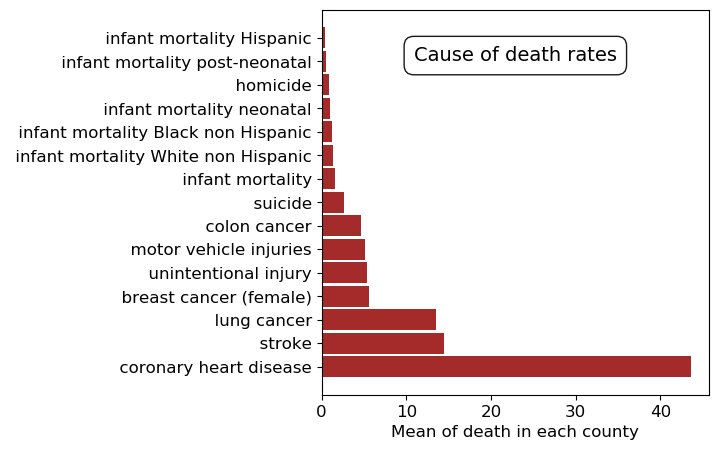

In [51]:
fig, ax = plt.subplots(1, figsize=(5, 5))
labels=list(short_description(i) for i in df_death_mean.Cause_of_Death)
plt.barh(labels, df_death_mean.Mean_Death, color='brown', height=0.9)
plt.xlabel('Mean of death in each county', fontsize=12)
plt.title('Cause of death rates', y=0.845, fontsize=14, 
          bbox=dict(facecolor='none', edgecolor='k', boxstyle='round,pad=0.5'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

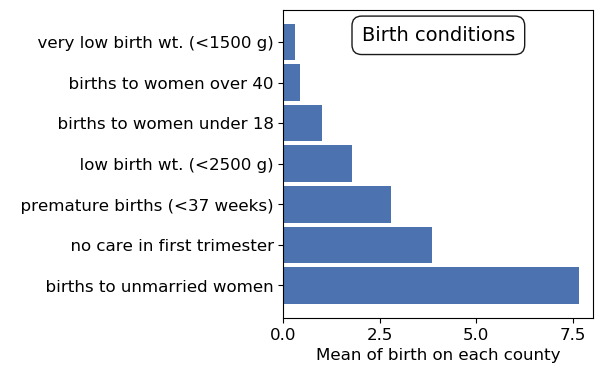

In [53]:
fig, ax = plt.subplots(1, figsize=(4, 4))
labels=list(short_description(i) for i in df_birth_mean.Birth)
plt.barh(labels, df_birth_mean.Mean_Birth, color='b', height=0.9)
plt.xlabel('Mean of birth on each county', fontsize=12)
plt.title('Birth conditions', y=0.872, fontsize=14,
         bbox=dict(facecolor='none', edgecolor='k', boxstyle='round,pad=0.5'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [25]:
Death_race_list = list(np.intersect1d(df.columns, LEADING_CAUSES_OF_DEATH.columns))
Black = []
Hispanic = []
White = []
other = []
for i in Death_race_list:
    if i not in county_info:
        if description(i).__contains__('Black'):
            Black.append(i)
        elif description(i).__contains__('Hispanic'):
            Hispanic.append(i)
        elif description(i).__contains__('White'):
            White.append(i)
        else:
            other.append(i)
    

In [26]:
Black_up_24=[]
Black_25=[]
Hispanic_up_24=[]
Hispanic_25=[]
White_up_24=[]
White_25=[]
other_up_24=[]
other_25=[]
for i in Black:
    if description(i).__contains__('25-44') or description(i).__contains__('45-64') or description(i).__contains__('65+'):
        Black_25.append(i)
    else:
        Black_up_24.append(i)    
for i in Hispanic:
    if description(i).__contains__('25-44') or description(i).__contains__('45-64') or description(i).__contains__('65+'):
        Hispanic_25.append(i)
    else:
        Hispanic_up_24.append(i)
for i in White:
    if description(i).__contains__('25-44') or description(i).__contains__('45-64') or description(i).__contains__('65+'):
        White_25.append(i)
    else:
        White_up_24.append(i)            
for i in other:
    if description(i).__contains__('25-44') or description(i).__contains__('45-64') or description(i).__contains__('65+'):
        other_25.append(i)
    else:
        other_up_24.append(i) 

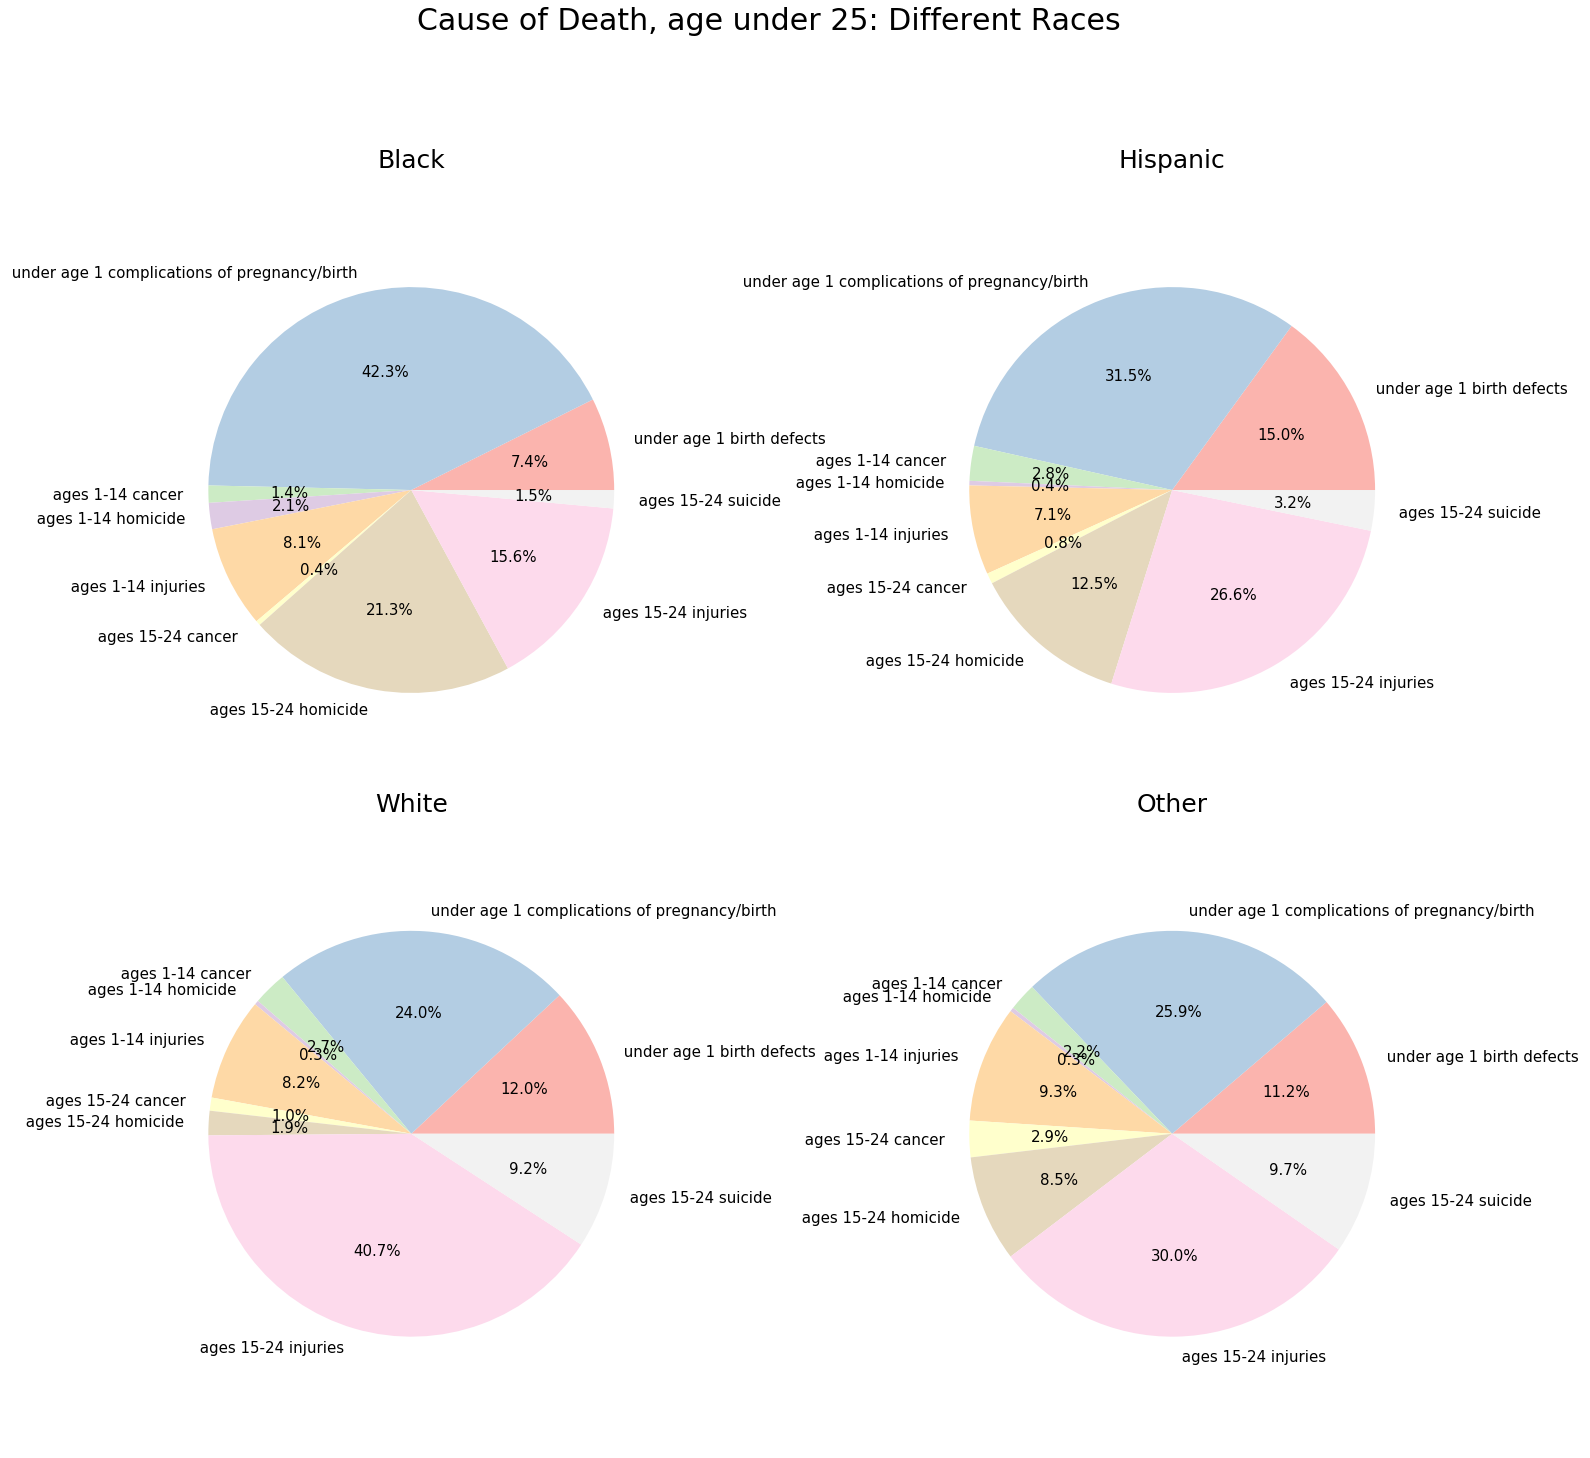

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 25), sharey=True)
fig.subplots_adjust(hspace=-0.1)
cs=cm.Pastel1(np.arange(100))
mpl.rcParams['font.size'] = 15
fig.suptitle('Cause of Death, age under 25: Different Races', y=0.95, fontsize=30)
ax1.set_title('Black', fontsize=25)
labels=list(short_race_description(i) for i in Black_up_24)
ax1.pie(list(np.mean(df[i]) for i in Black_up_24),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax2.set_title('Hispanic', fontsize=25)
labels=list(short_race_description(i) for i in Hispanic_up_24)
ax2.pie(list(np.mean(df[i]) for i in Hispanic_up_24),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax3.set_title('White', fontsize=25)
labels=list(short_race_description(i) for i in White_up_24)
ax3.pie(list(np.mean(df[i]) for i in White_up_24),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax4.set_title('Other', fontsize=25)
labels=list(short_race_description(i) for i in other_up_24)
ax4.pie(list(np.mean(df[i])*2 for i in other_up_24),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

plt.show()

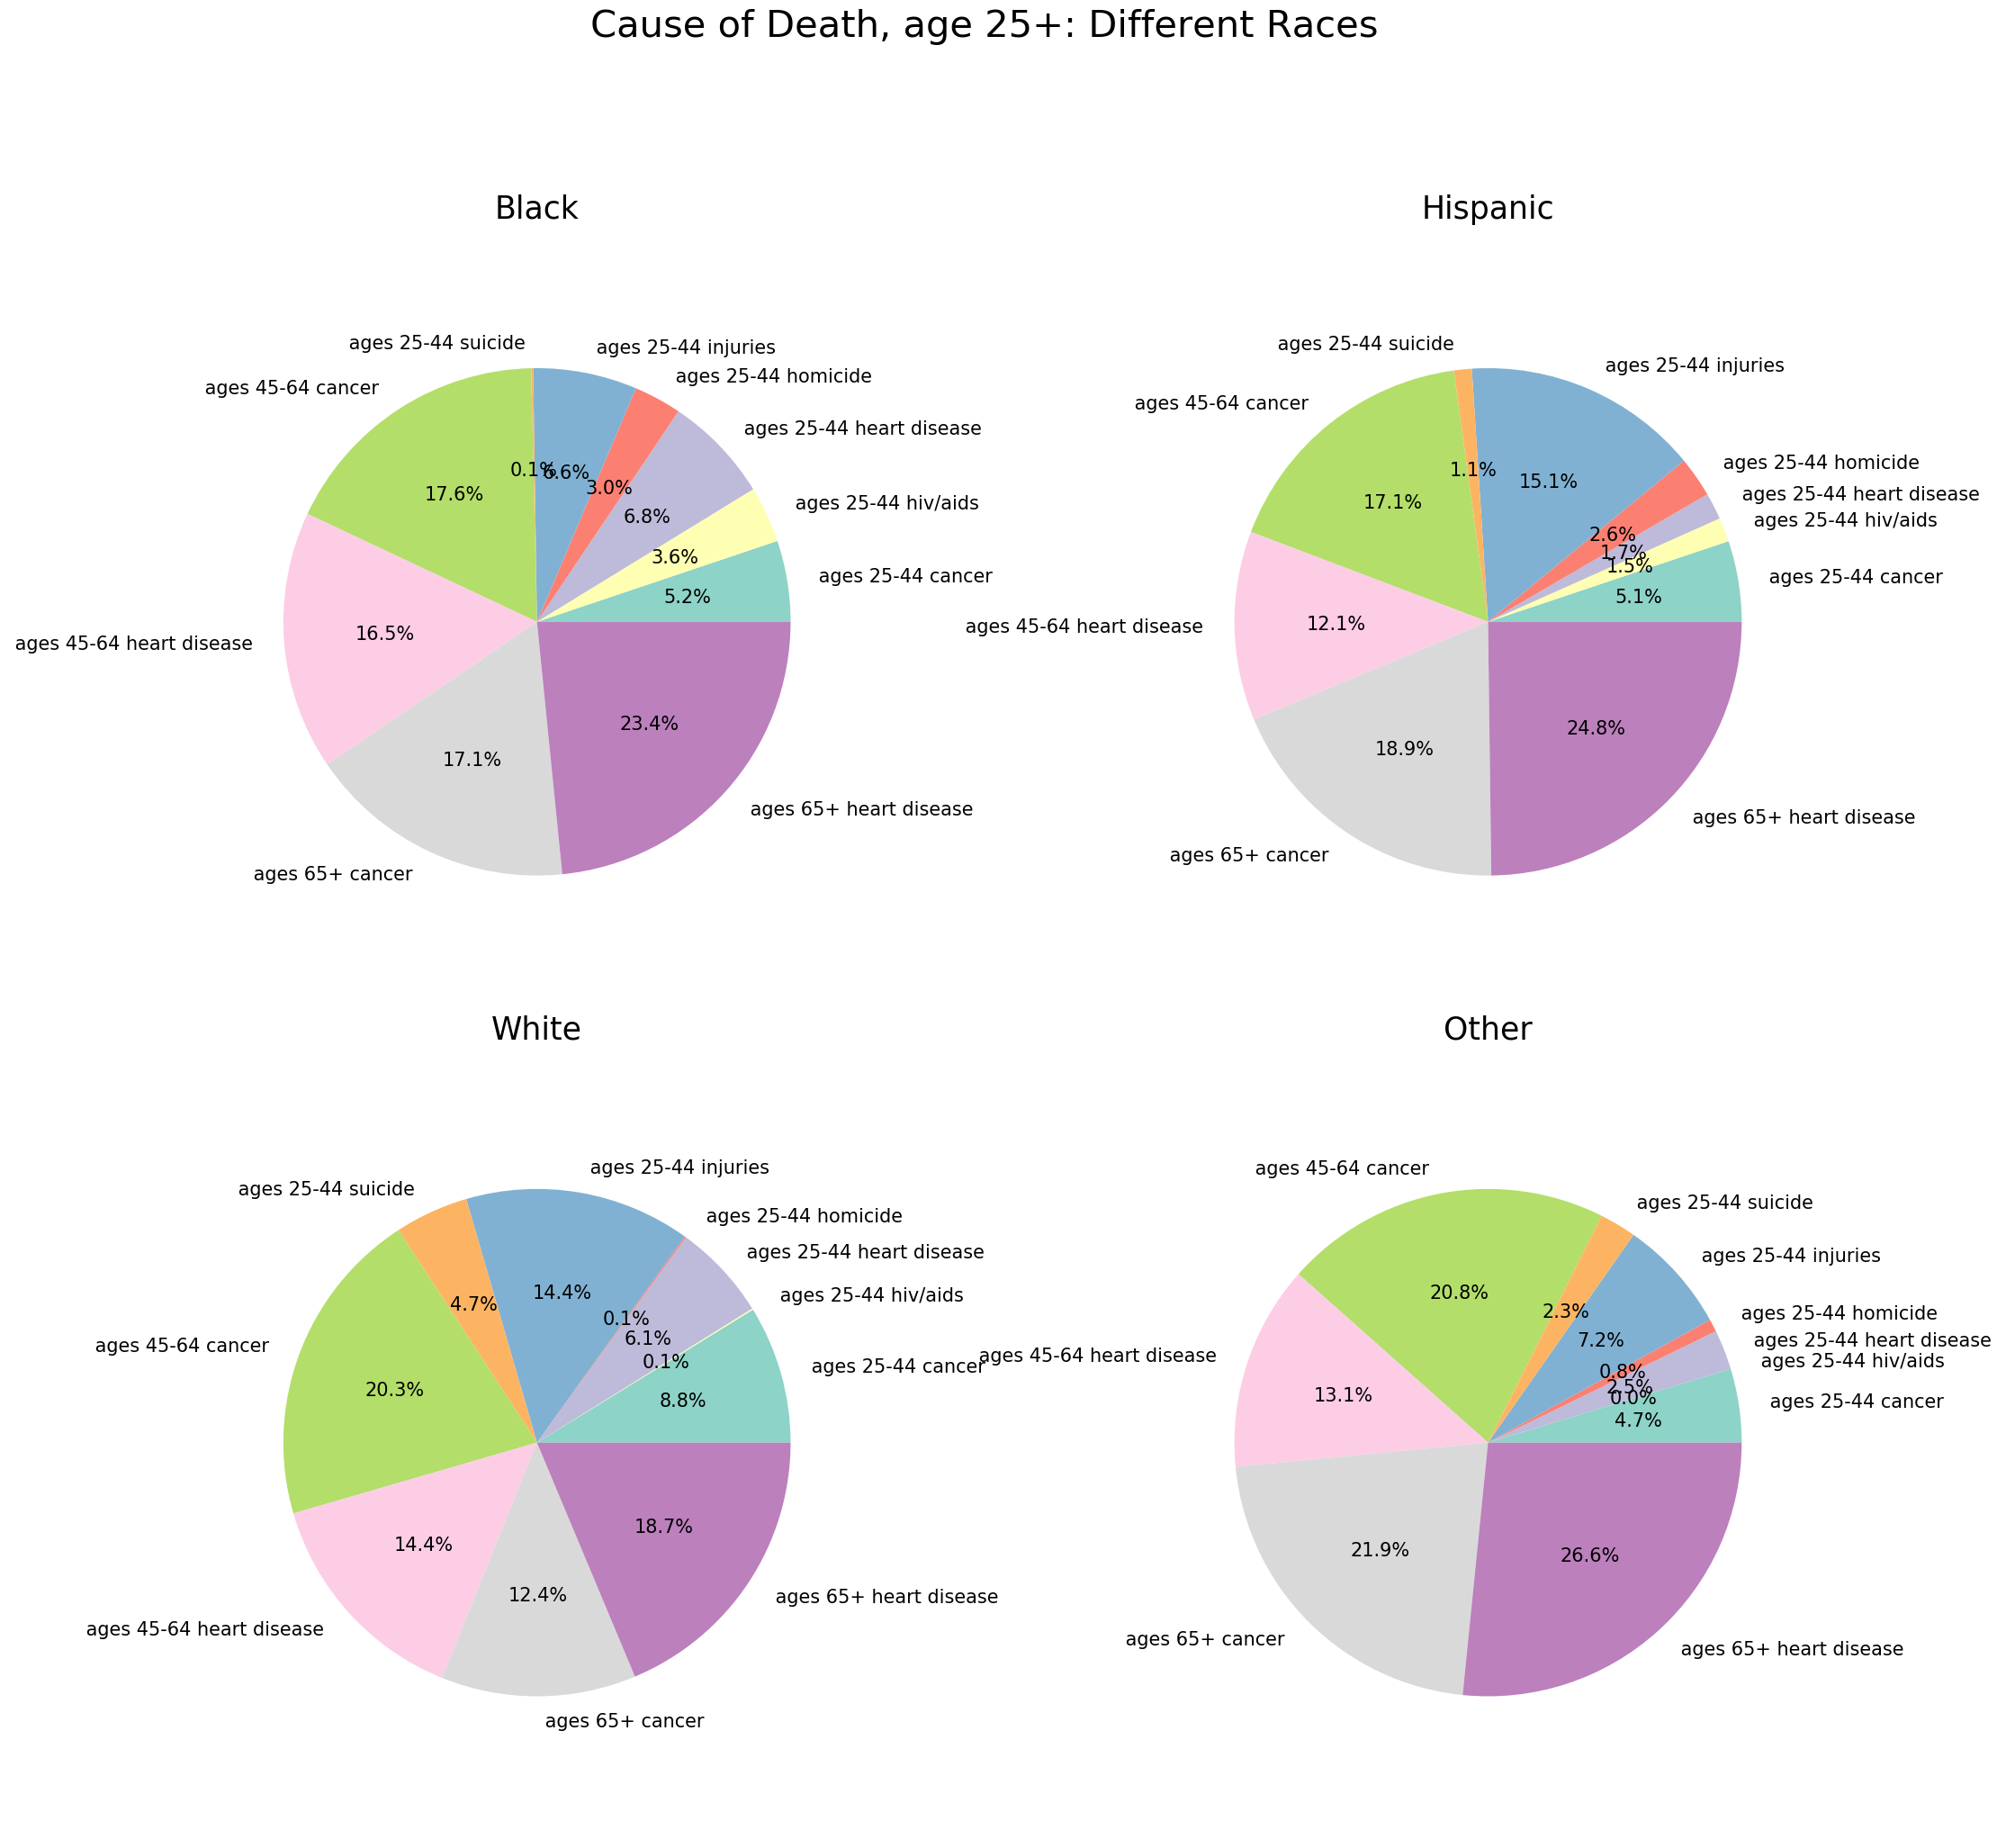

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(25, 25), sharey=True)
fig.subplots_adjust(hspace=-0.1)
cs=cm.Set3(np.arange(100))
mpl.rcParams['font.size'] = 15
fig.suptitle('Cause of Death, age 25+: Different Races', y=0.95, fontsize=30)
ax1.set_title('Black', fontsize=25)
labels=list(short_race_description(i) for i in Black_25)
ax1.pie(list(np.mean(df[i]) for i in Black_25),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax2.set_title('Hispanic', fontsize=25)
labels=list(short_race_description(i) for i in Hispanic_25)
ax2.pie(list(np.mean(df[i]) for i in Hispanic_25),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax3.set_title('White', fontsize=25)
labels=list(short_race_description(i) for i in White_25)
ax3.pie(list(np.mean(df[i]) for i in White_25),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

ax4.set_title('Other', fontsize=25)
labels=list(short_race_description(i) for i in other_25)
ax4.pie(list(np.mean(df[i]) for i in other_25),
        labels=labels, colors=cs, autopct='%1.1f%%', radius=0.8)

plt.show()

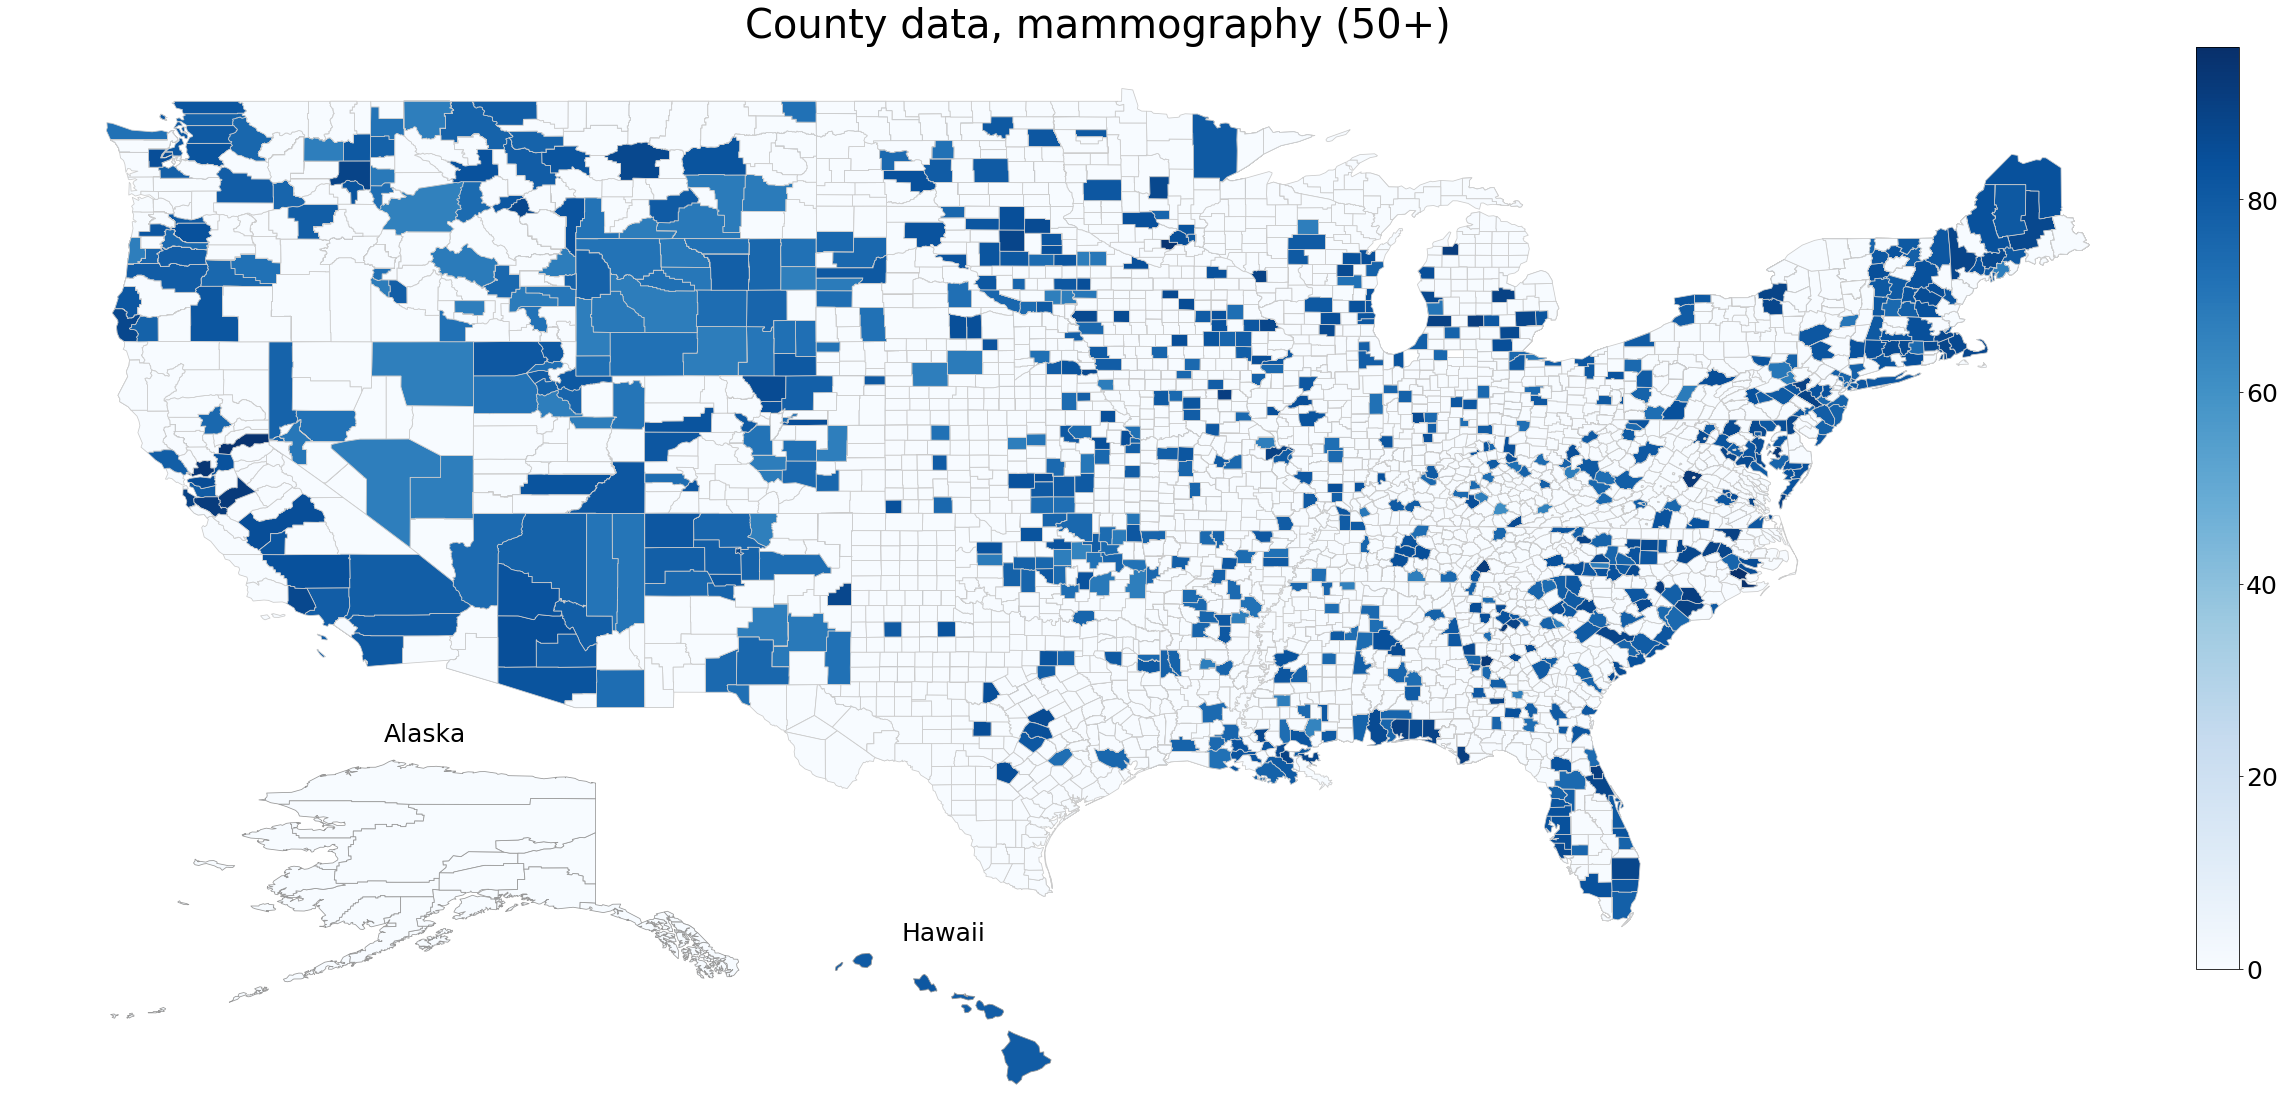

In [30]:
df.Mammogram
US_plot('Mammogram')

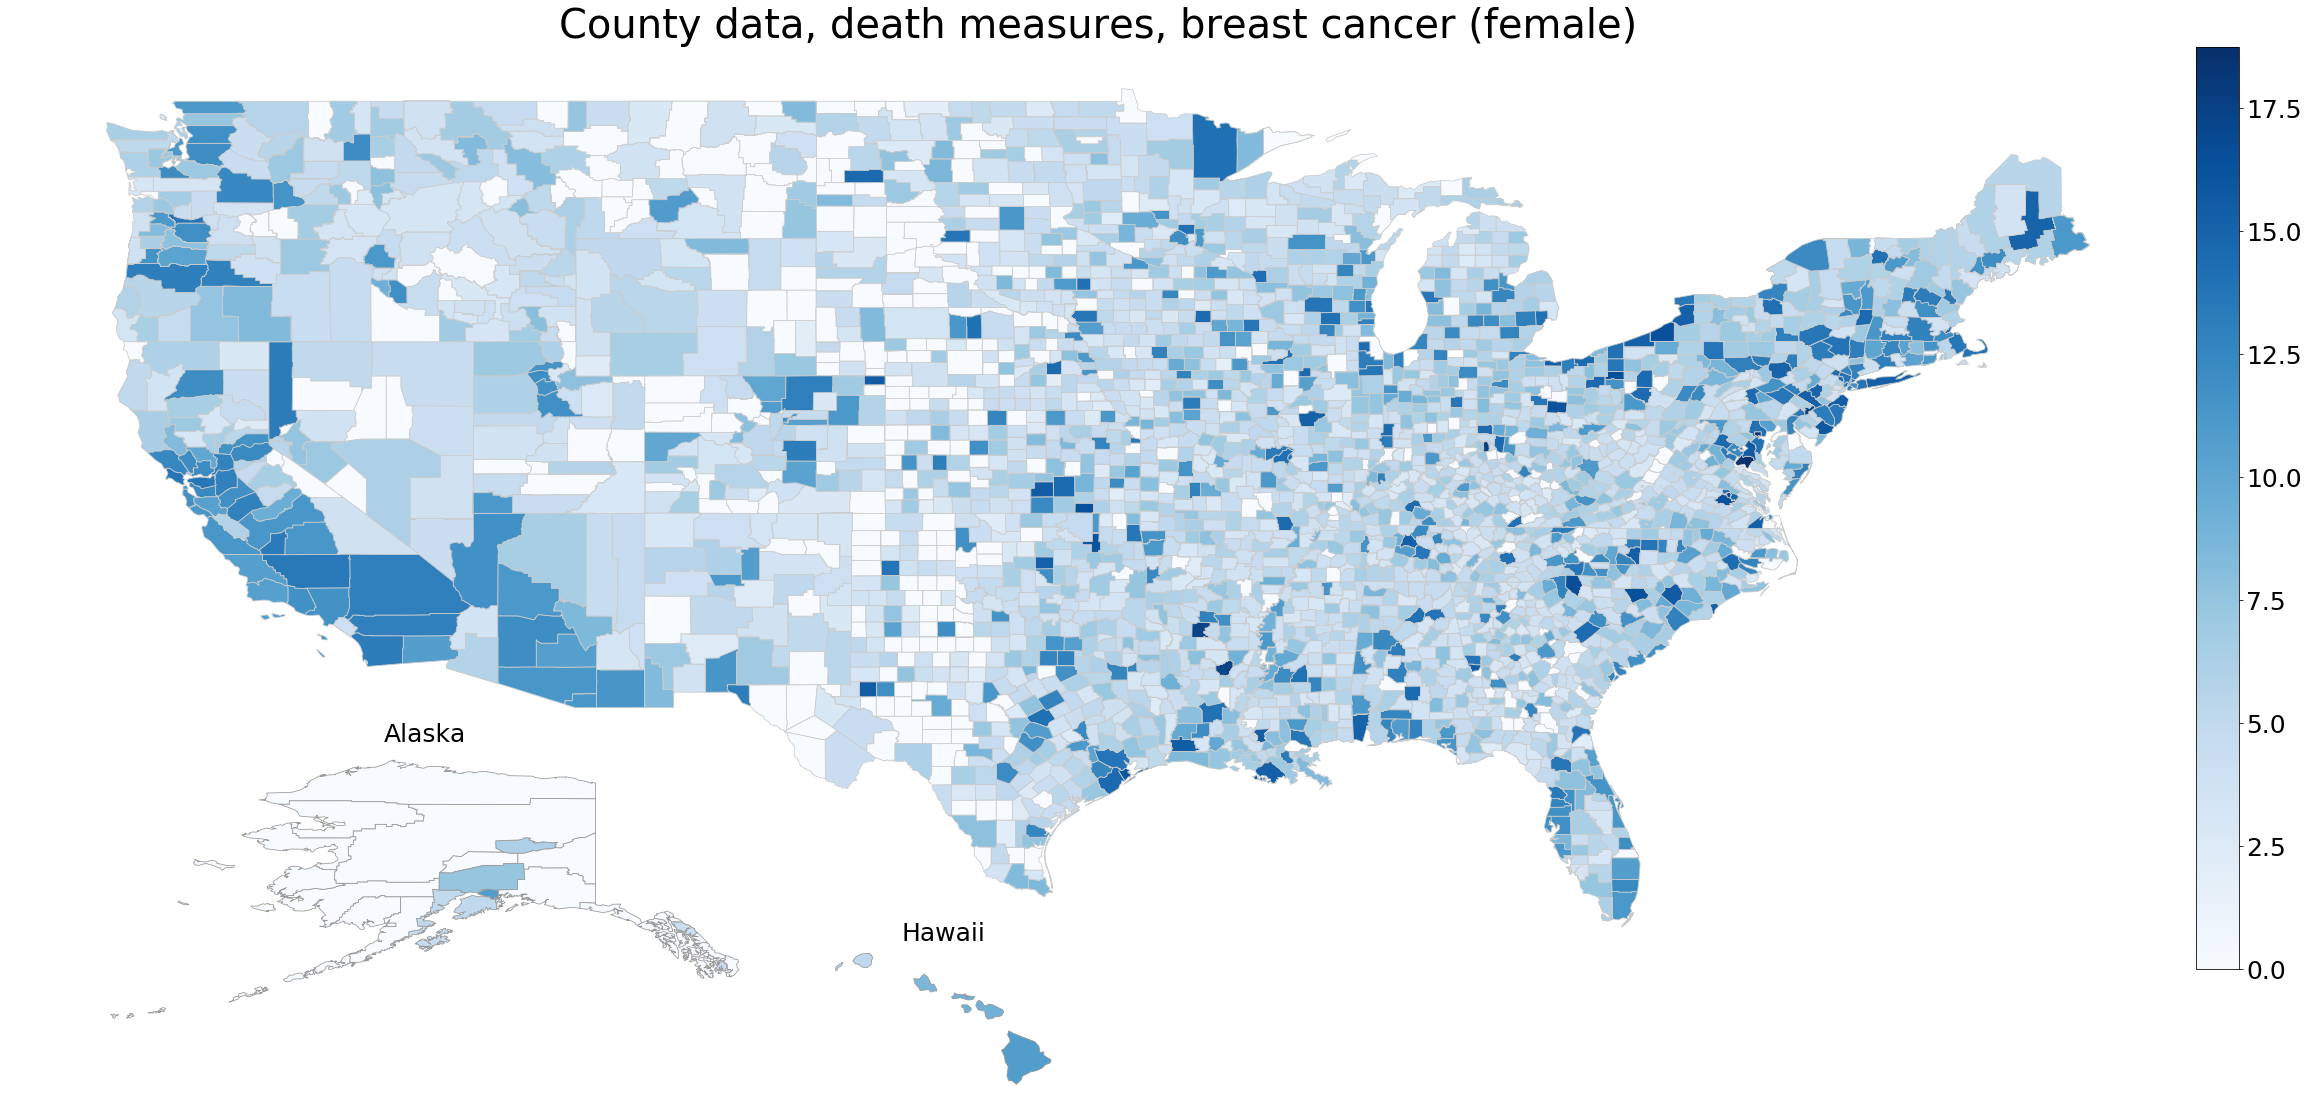

In [31]:
US_plot('Brst_Cancer')

<div class="span5 alert alert-info">
    
### *Correlations between Variables*


The following table shows the Pearson correlation between variables:

In [54]:
df.corr(method ='pearson') 

State_FIPS_Code  County_FIPS_Code  Strata_ID_Number  \
State_FIPS_Code                1.000000          0.166480          0.000187   
County_FIPS_Code               0.166480          1.000000          0.044329   
Strata_ID_Number               0.000187          0.044329          1.000000   
Number_Counties                0.027089          0.028094         -0.016999   
Population_Size               -0.057695         -0.051829         -0.385595   
...                                 ...               ...               ...   
Nitrogen_Dioxide_Ind          -0.014068         -0.075417         -0.795967   
Sulfur_Dioxide_Ind            -0.014068         -0.075417         -0.795967   
Ozone_Ind                     -0.043496         -0.078794         -0.683131   
Particulate_Matter_Ind        -0.027528         -0.073277         -0.770920   
Lead_Ind                      -0.014104         -0.075084         -0.793512   

                        Number_Counties  Population_Size  Population_Density  \
State_FIPS_Code                0.027089        -0.057695            0.023598   
County_FIPS_Code               0.028094        -0.051829            0.052212   
Strata_ID_Number              -0.016999        -0.385595           -0.185758   
Number_Counties                1.000000        -0.085950           -0.031292   
Population_Size               -0.085950         1.000000            0.335231   
...                                 ...              ...                 ...   
Nitrogen_Dioxide_Ind          -0.129497         0.477760            0.222360   
Sulfur_Dioxide_Ind            -0.129497         0.477760            0.222360   
Ozone_Ind                     -0.104967         0.522135            0.195464   
Particulate_Matter_Ind        -0.129573         0.509329            0.213169   
Lead_Ind                      -0.126564         0.475792            0.221272   

                         Poverty  Age_19_Under  Age_19_64  Age_65_84  ...  \
State_FIPS_Code        -0.020754     -0.077999  -0.037598   0.098458  ...   
County_FIPS_Code        0.140420      0.127726  -0.110678  -0.004368  ...   
Strata_ID_Number        0.276217     -0.147028  -0.329400   0.388108  ...   
Number_Counties        -0.108006     -0.073129  -0.075331   0.105265  ...   
Population_Size        -0.055041      0.126784   0.104946  -0.193847  ...   
...                          ...           ...        ...        ...  ...   
Nitrogen_Dioxide_Ind   -0.189415      0.185081   0.249407  -0.354018  ...   
Sulfur_Dioxide_Ind     -0.189415      0.185081   0.249407  -0.354018  ...   
Ozone_Ind              -0.169929      0.181667   0.224395  -0.331683  ...   
Particulate_Matter_Ind -0.166007      0.197109   0.233078  -0.350170  ...   
Lead_Ind               -0.189819      0.184625   0.249517  -0.353629  ...   

                        Salm_Exp  Shig_Rpt  Shig_Exp  Toxic_Chem  \
State_FIPS_Code        -0.063681 -0.006557 -0.061807   -0.013879   
County_FIPS_Code       -0.055910  0.029384 -0.034715   -0.019483   
Strata_ID_Number       -0.465205 -0.297500 -0.419904   -0.155351   
Number_Counties        -0.107958 -0.062619 -0.088583   -0.068168   
Population_Size         0.978261  0.523775  0.901652    0.204323   
...                          ...       ...       ...         ...   
Nitrogen_Dioxide_Ind    0.583461  0.376931  0.532349    0.217413   
Sulfur_Dioxide_Ind      0.583461  0.376931  0.532349    0.217413   
Ozone_Ind               0.613932  0.401853  0.563673    0.249636   
Particulate_Matter_Ind  0.604673  0.385331  0.559581    0.222776   
Lead_Ind                0.581096  0.375404  0.529744    0.219943   

                        Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  \
State_FIPS_Code                   -0.016436             -0.014068   
County_FIPS_Code                  -0.075387             -0.075417   
Strata_ID_Number                  -0.793963             -0.795967   
Number_Counties                   -0.128768             -0.129497   
Population_Size            

Well, this is too much information about our big dataframe! To know about the important  correlated variables we need more cleaning;

I'll make another small dataframe with 3 columns: column one and two--> correlated pairs and column 3 the magnitude of their correlations. To make it easier to see the highly correlated parameters I sort them. I also defined a threshold=0.7 to cut low-correlated ones. 

In [33]:
not_helping_columns = ['Sulfur_Dioxide_Ind', 
                       'Nitrogen_Dioxide_Ind', 'Lead_Ind', 'Carbon_Monoxide_Ind', 'Particulate_Matter_Ind', 'Time']
attrs = df.drop(columns=not_helping_columns).corr()
threshold = 0.6
high_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()
df_corrs = pd.DataFrame(list((sorted(key)[0], sorted(key)[1], high_corrs [key]) for key in high_corrs),
                        columns=['attribute_1','attribute_2', 'correlation'])
df_corrs = df_corrs.iloc[abs(df_corrs['correlation']).argsort()[::-1]].drop_duplicates().reset_index(drop=True)
df_corrs.head(20)


attribute_1       attribute_2  correlation
0    Major_Depression   Population_Size     0.993877
1     Population_Size      Total_Births     0.993762
2            Pert_Exp   Population_Size     0.993672
3    Elderly_Medicare      Total_Deaths     0.993192
4            HepA_Exp          HepB_Exp     0.992540
5       No_HS_Diploma         Uninsured     0.991927
6            HepA_Exp   Population_Size     0.989902
7    Major_Depression          Pert_Exp     0.989281
8     Population_Size   Recent_Drug_Use     0.986504
9            Pert_Exp      Total_Births     0.986449
10           HepA_Exp      Total_Births     0.986186
11           HepA_Exp          Pert_Exp     0.985803
12           HepA_Exp  Major_Depression     0.984434
13    Population_Size        Unemployed     0.984176
14   Major_Depression      Total_Births     0.984092
15       Total_Births        Unemployed     0.984065
16           HepB_Exp   Population_Size     0.983862
17  Disabled_Medicare      Total_Deaths     0.983111
18           Ecol_Exp   Population_Size     0.982927
19           HepB_Exp      Syphilis_Exp     0.982537

Alright! It looks better!

In [55]:
# If we want to make a df with tuples of correlated pairs:
# df_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), high_corrs [key])
#                                   for key in high_corrs])), columns=['attribute_pair', 'correlation'])

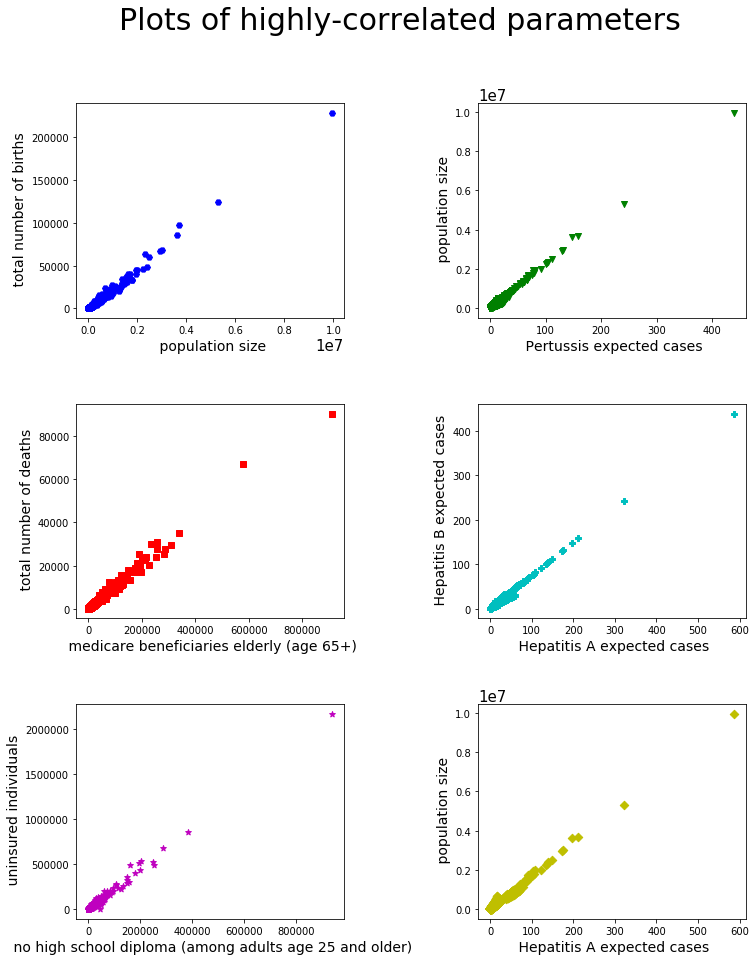

In [34]:
#Here we plot the top 6 most correlated parameters:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
markers = ['H', 'v', 's', 'P', '*', 'D']
fig, axs = plt.subplots(3,2, figsize=(12,15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.4, wspace=0.5)
fig.suptitle('Plots of highly-correlated parameters', y=0.97, fontsize=30)
axs = axs.ravel()

for i in range(6):
    axs[i].scatter(df[df_corrs.loc[i+1,'attribute_1']], df[df_corrs.loc[i+1,'attribute_2']], 
                   marker=markers[i], color=colors[i])
    axs[i].set_xlabel(short_description(df_corrs.loc[i+1,'attribute_1']), fontsize=14)
    axs[i].set_ylabel(short_description(df_corrs.loc[i+1,'attribute_2']), fontsize=14)
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

In [35]:
for i in Death:
    print(df_corrs[df_corrs['attribute_1']==i].head(10))

     attribute_1    attribute_2  correlation
162  Brst_Cancer    E_Wh_Cancer     0.886133
175  Brst_Cancer    F_Wh_Cancer     0.880687
179  Brst_Cancer     Col_Cancer     0.876601
190  Brst_Cancer      Premature     0.871133
194  Brst_Cancer            LBW     0.866469
195  Brst_Cancer    Lung_Cancer     0.865634
199  Brst_Cancer  F_Wh_HeartDis     0.863822
207  Brst_Cancer  E_Wh_HeartDis     0.859256
237  Brst_Cancer           VLBW     0.831433
238  Brst_Cancer         Stroke     0.831162
    attribute_1    attribute_2  correlation
110         CHD  F_Wh_HeartDis     0.935667
142         CHD  E_Wh_HeartDis     0.899126
171         CHD    Lung_Cancer     0.883059
183         CHD      Premature     0.875345
204         CHD            LBW     0.859882
224         CHD     Col_Cancer     0.843544
230         CHD    F_Wh_Cancer     0.835635
252         CHD      Unmarried     0.820675
255         CHD    E_Wh_Cancer     0.818792
264         CHD           VLBW     0.812496
    attribute_1    at

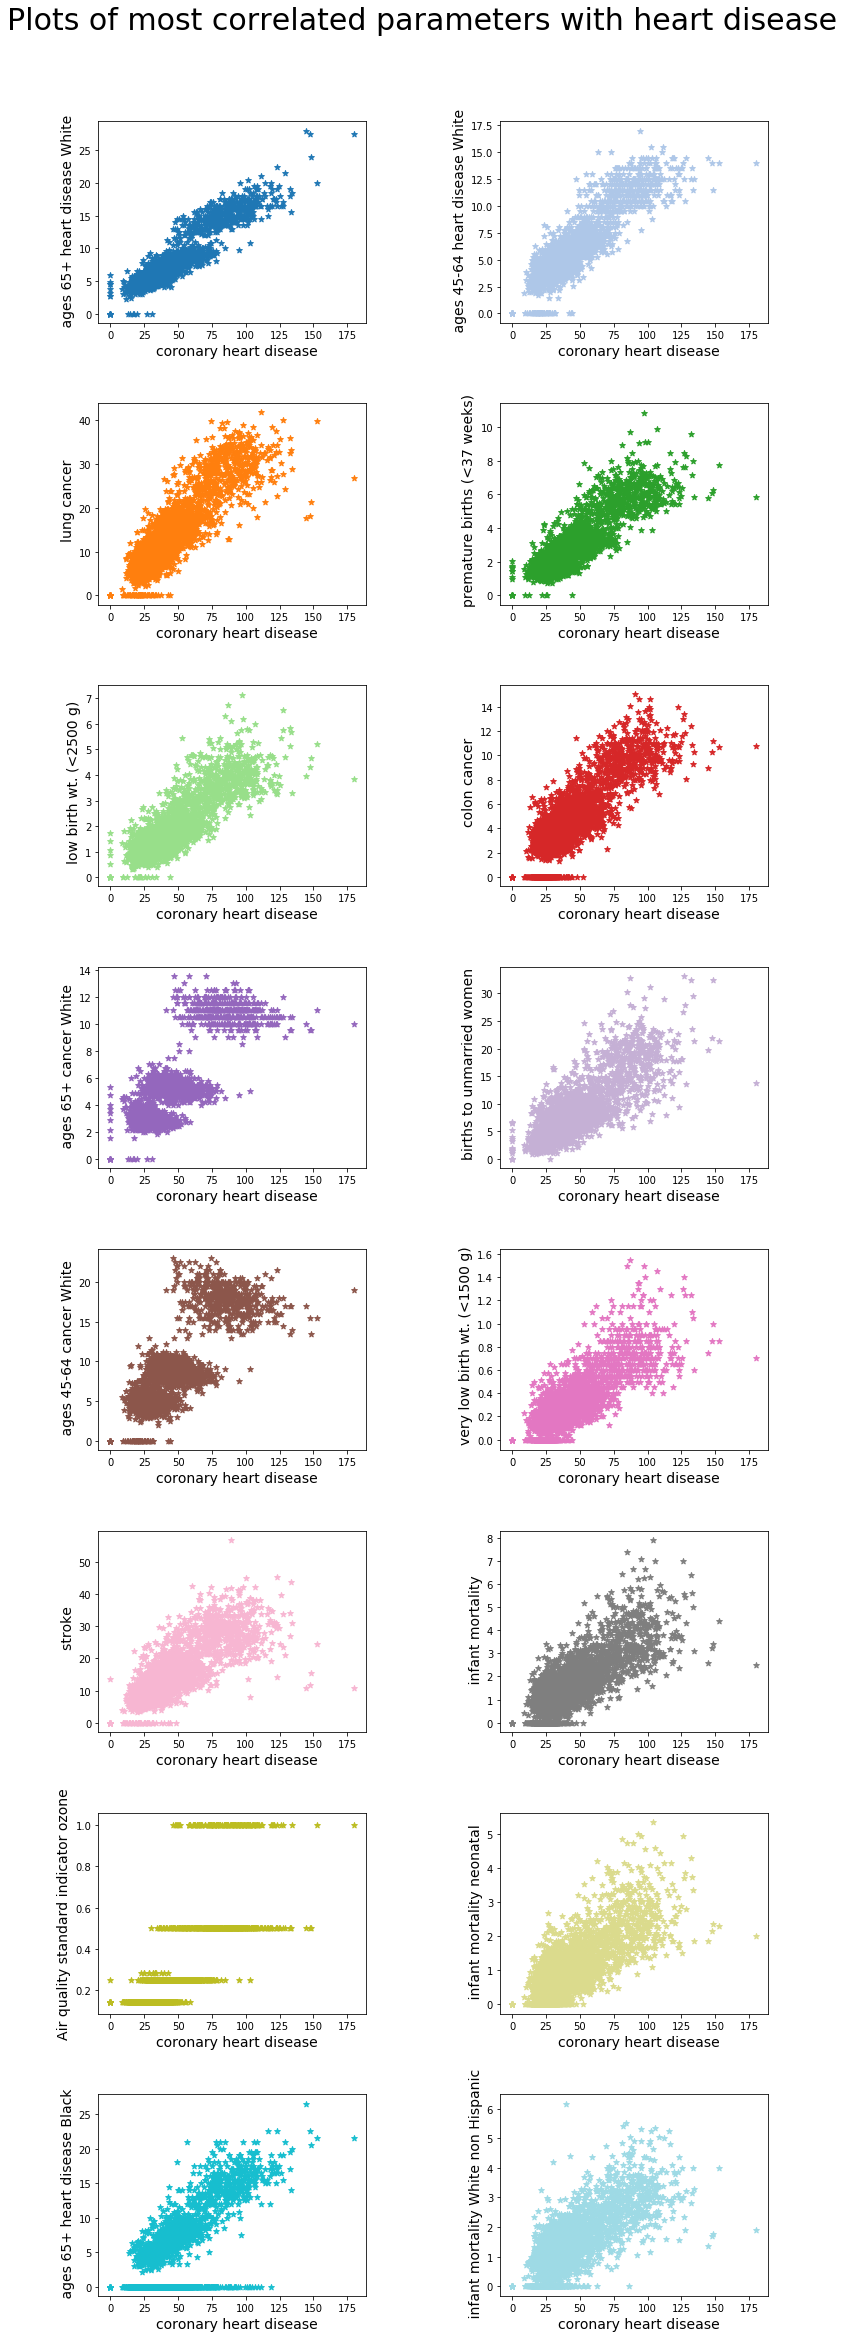

In [36]:
#Now the most correlated parameters with heart diseas:
num_plots = 16
colors = cm.tab20(np.linspace(0, 1, num_plots))
fig, axs = plt.subplots(int(num_plots/2),2, figsize=(12,40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.4, wspace=0.5)
fig.suptitle('Plots of most correlated parameters with heart disease', y=0.92, fontsize=30)
axs = axs.ravel()

corr_params = list(df_corrs[df_corrs['attribute_1']=='CHD']['attribute_2'])
for i in range(num_plots):
    axs[i].scatter(df['CHD'], df[corr_params[i]], 
                   marker='*', color=colors[i])
    axs[i].set_xlabel(short_description('CHD'), fontsize=14)
    axs[i].set_ylabel(short_description(corr_params[i]), fontsize=14)
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

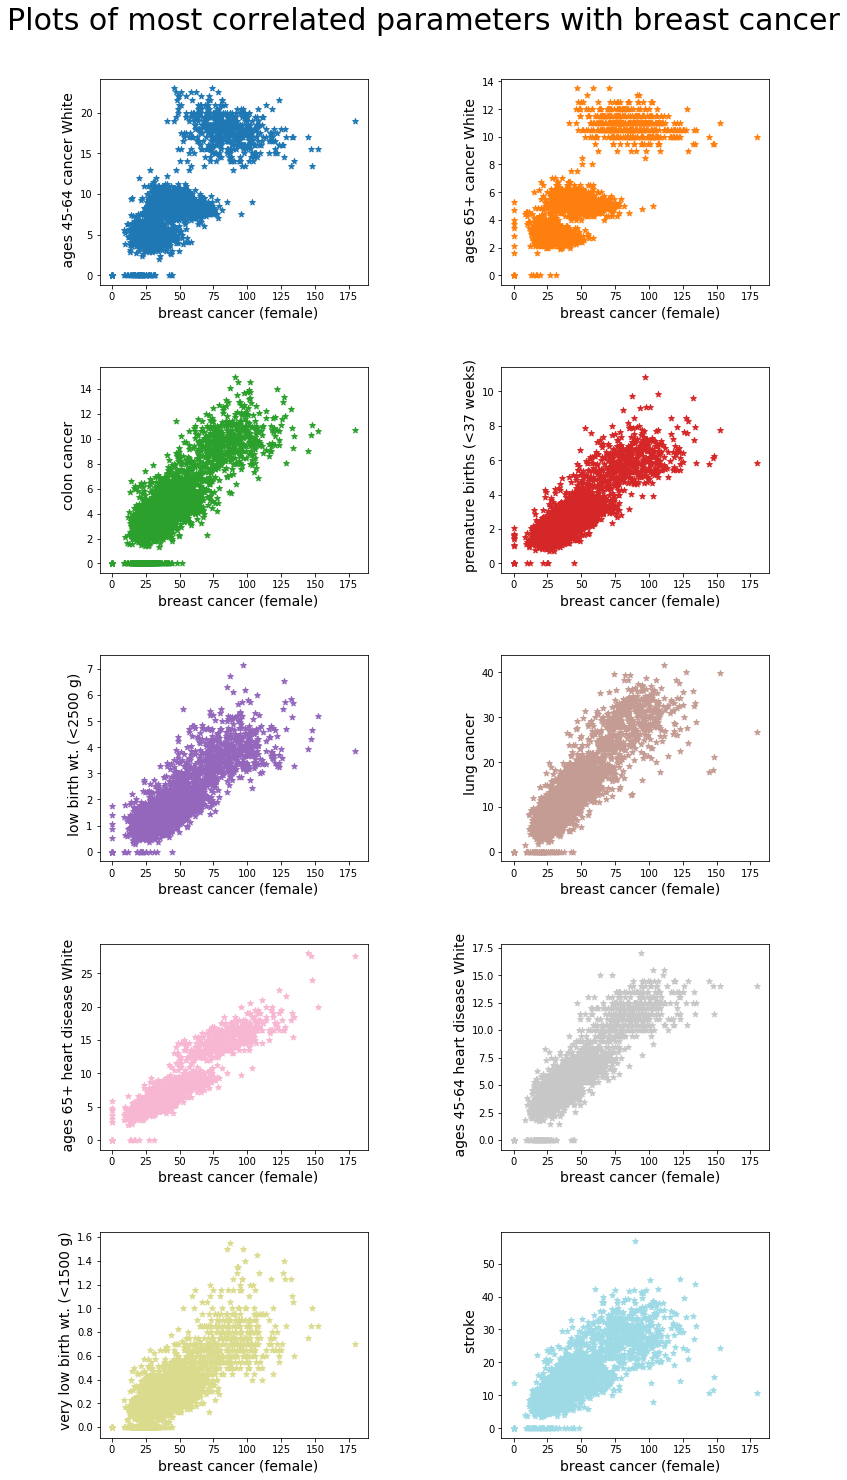

In [37]:
#Now the most correlated parameters with breast cancer:
num_plots = 10
colors = cm.tab20(np.linspace(0, 1, num_plots))
fig, axs = plt.subplots(int(num_plots/2),2, figsize=(12,25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.4, wspace=0.5)
fig.suptitle('Plots of most correlated parameters with breast cancer', y=0.92, fontsize=30)
axs = axs.ravel()

corr_params = list(df_corrs[df_corrs['attribute_1']=='Brst_Cancer']['attribute_2'])
for i in range(num_plots):
    axs[i].scatter(df['CHD'], df[corr_params[i]], 
                   marker='*', color=colors[i])
    axs[i].set_xlabel(short_description('Brst_Cancer'), fontsize=14)
    axs[i].set_ylabel(short_description(corr_params[i]), fontsize=14)
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)


Okk! Correlated parameters are great and can be discussed in statistical inference section. 
Now how about looking at the data from States point of view: 

In [38]:
#A new dataframe based on States:
df_state = df.groupby('CHSI_State_Abbr').sum().reset_index() 
df_state.head()

CHSI_State_Abbr  State_FIPS_Code  County_FIPS_Code  Strata_ID_Number  \
0              AK               54              4162              1957   
1              AL               67              4489              2745   
2              AR              375              5625              3993   
3              AZ               60               208               513   
4              CA              348              3364              1201   

   Number_Counties  Population_Size  Population_Density  Poverty  \
0              946           663661               213.0    327.9   
1             2489          4557808              5736.0   1144.7   
2             2753          2779154              3877.0   1334.5   
3              491          5939292               714.0    252.6   
4             2174         36132147             36531.0    746.4   

   Age_19_Under  Age_19_64  ...     Salm_Exp    Shig_Rpt     Shig_Exp  \
0         795.1     1718.6  ...   118.857143   26.821429    61.107143   
1        1689.5     4063.9  ...   971.142857  609.821429   555.357143   
2        1866.1     4469.7  ...   589.821429  359.500000   269.000000   
3         422.2      847.8  ...   945.000000  869.000000   645.071429   
4        1505.6     3564.9  ...  5618.250000    0.000000  3304.464286   

     Toxic_Chem  Carbon_Monoxide_Ind  Nitrogen_Dioxide_Ind  \
0  8.371644e+07             4.642857              4.642857   
1  4.291972e+07            16.857143             16.357143   
2  1.140120e+07            14.500000             14.500000   
3  1.833658e+07             5.285714              5.285714   
4  2.311464e+07            22.285714             22.285714   

   Sulfur_Dioxide_Ind  Ozone_Ind  Particulate_Matter_Ind   Lead_Ind  
0            4.642857   4.642857                4.642857   4.642857  
1           16.357143  18.357143               16.357143  16.357143  
2           14.500000  15.250000               14.500000  14.500000  
3            5.285714   6.535714                6.535714   5.285714  
4           22.285714  35.821429               25.571429  22.285714  

[5 rows x 195 columns]

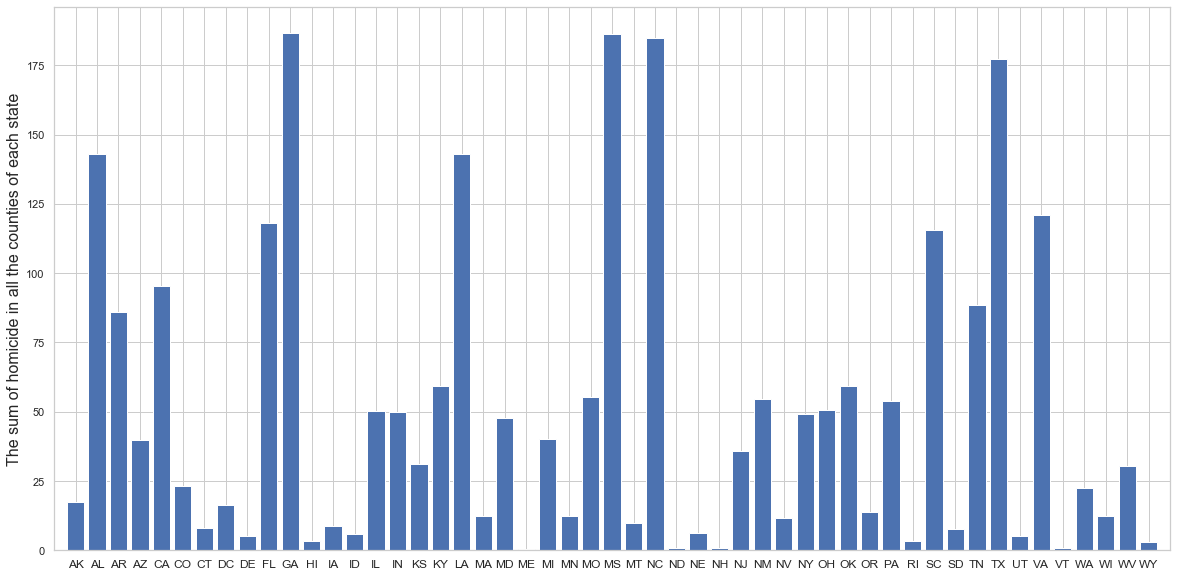

In [39]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(1, figsize=(20, 10))
plt.bar(df_state['CHSI_State_Abbr'], df_state['Homicide'], color='b')
plt.xlim(-1, len(df_state.index))
plt.ylabel('The sum of homicide in all the counties of each state', fontsize=16)
plt.xticks(fontsize=12)
plt.show()


In [40]:
sns.reset_defaults()
us_state = gpd.read_file('../US-States/states.shp')
us_state_land = us_state[ (us_state['STATE_NAME']!='Alaska') 
                     &(us_state['STATE_NAME']!='Hawaii')]
us_state_Alaska = us_state[us_state['STATE_NAME']=='Alaska']
us_state_Hawaii = us_state[us_state['STATE_NAME']=='Hawaii']
us_state.head()
#Merging map and data:

df_state_land = us_state_land.set_index('STATE_ABBR').join(df_state.set_index('CHSI_State_Abbr'))
df_state_Alaska = us_state_Alaska.set_index('STATE_ABBR').join(df_state.set_index('CHSI_State_Abbr'))
df_state_Hawaii = us_state_Hawaii.set_index('STATE_ABBR').join(df_state.set_index('CHSI_State_Abbr'))

def min_max_col2(variable):
    minimum = min(df_state_land[variable].min(), 
              df_state_Alaska[variable].min(), df_state_Hawaii[variable].min())
    maximum = max(df_state_land[variable].max(), 
              df_state_Alaska[variable].max(), df_state_Hawaii[variable].max())
    return minimum, maximum

def US_state_plot(variable, color='Blues'):
    h, w = figaspect(1.)
    mn, mx = min_max_col2(variable)
    fig, ax1 = plt.subplots(1, figsize=(w*10, h*10))
    ax1.axis('off')
    ax1.set_title(short_description(variable), fontsize=40)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='2%', pad=0.1)
    cax.tick_params(labelsize=25)
    df_state_land.plot(column=variable, cmap=color,
                        linewidth=0.8, ax=ax1,
                        edgecolor='0.8', vmin=mn ,vmax=mx,
                        legend=True, cax=cax)

    
    left, bottom, width, height = [0.15, 0.22, 0.24, 0.3] 
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.axis('off')
    ax2.set_title('Alaska', fontsize=25)
    df_state_Alaska.plot(column=variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax2, edgecolor='0.6')
    
    left, bottom, width, height = [0.35, 0.3, 0.2, 0.05]
    ax3 = fig.add_axes([left, bottom, width, height])
    ax3.axis('off')
    ax3.set_title('Hawaii', fontsize=25)
    df_state_Hawaii.plot(column =variable, cmap=color, vmin=mn ,vmax=mx,
                          linewidth=0.8, ax=ax3, edgecolor='0.6')


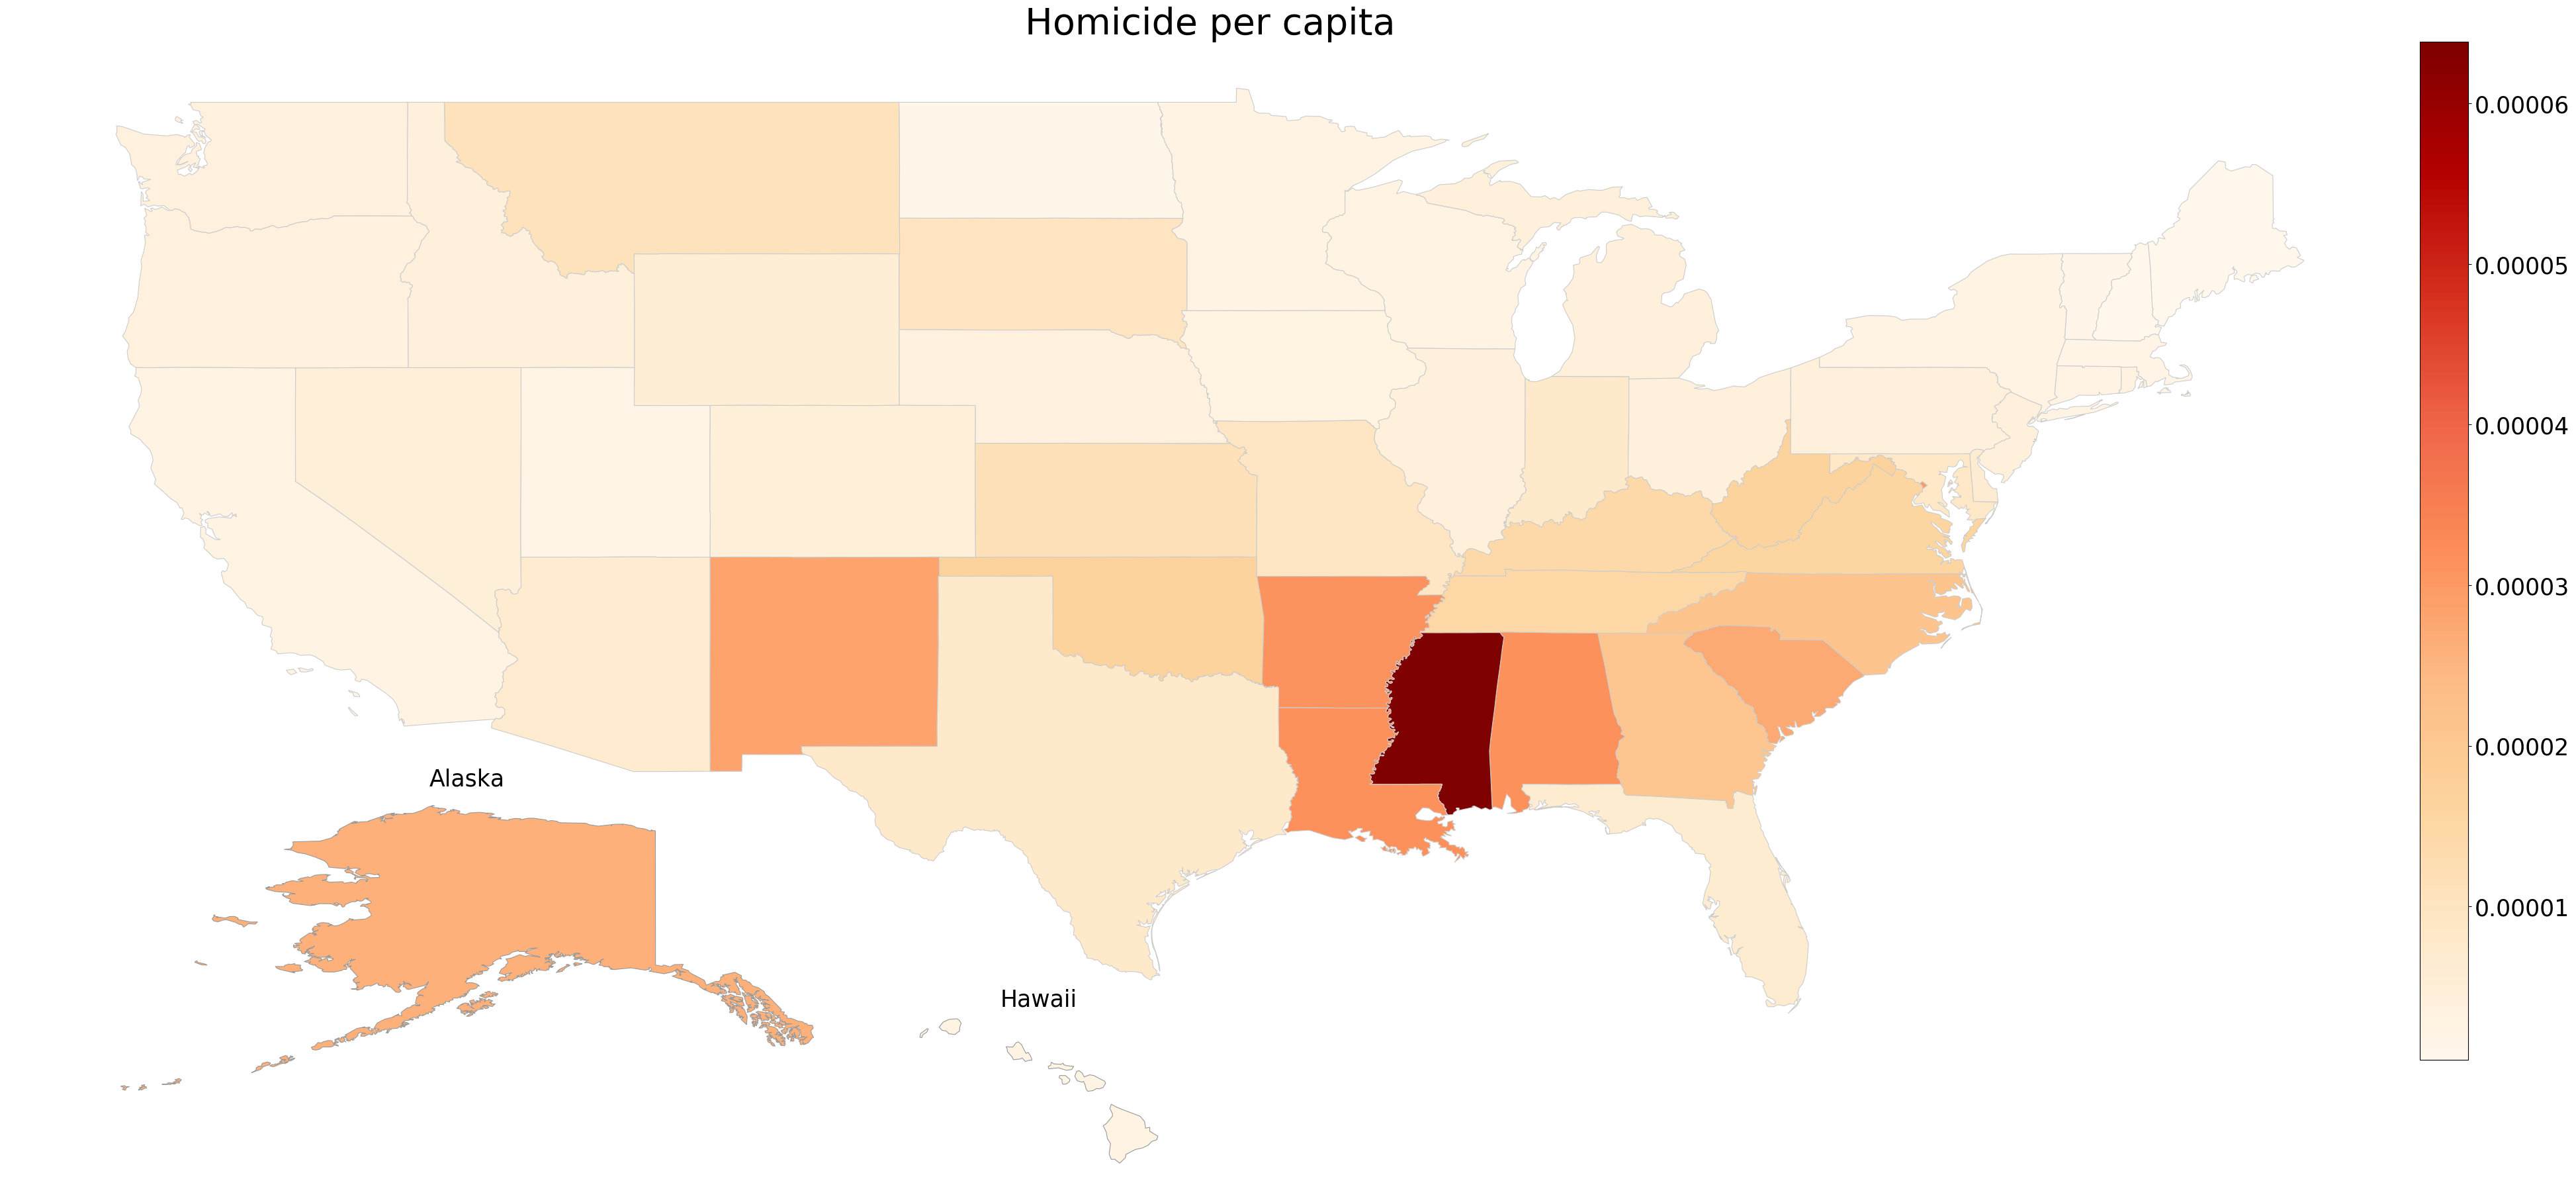

In [41]:
df_state_land['Homicide_per_capita'] = df_state_land['Homicide'].div(df_state_land['Population_Size'])
df_state_Alaska['Homicide_per_capita'] = df_state_Alaska['Homicide'].div(df_state_Alaska['Population_Size'])
df_state_Hawaii['Homicide_per_capita'] = df_state_Hawaii['Homicide'].div(df_state_Hawaii['Population_Size'])
new_item = pd.DataFrame({'COLUMN_NAME':['Homicide_per_capita'], 'DESCRIPTION':['Homicide per capita']})
DATA_ELEMENT_DESCRIPTION = DATA_ELEMENT_DESCRIPTION.append(new_item, sort=False)

US_state_plot('Homicide_per_capita', 'OrRd')

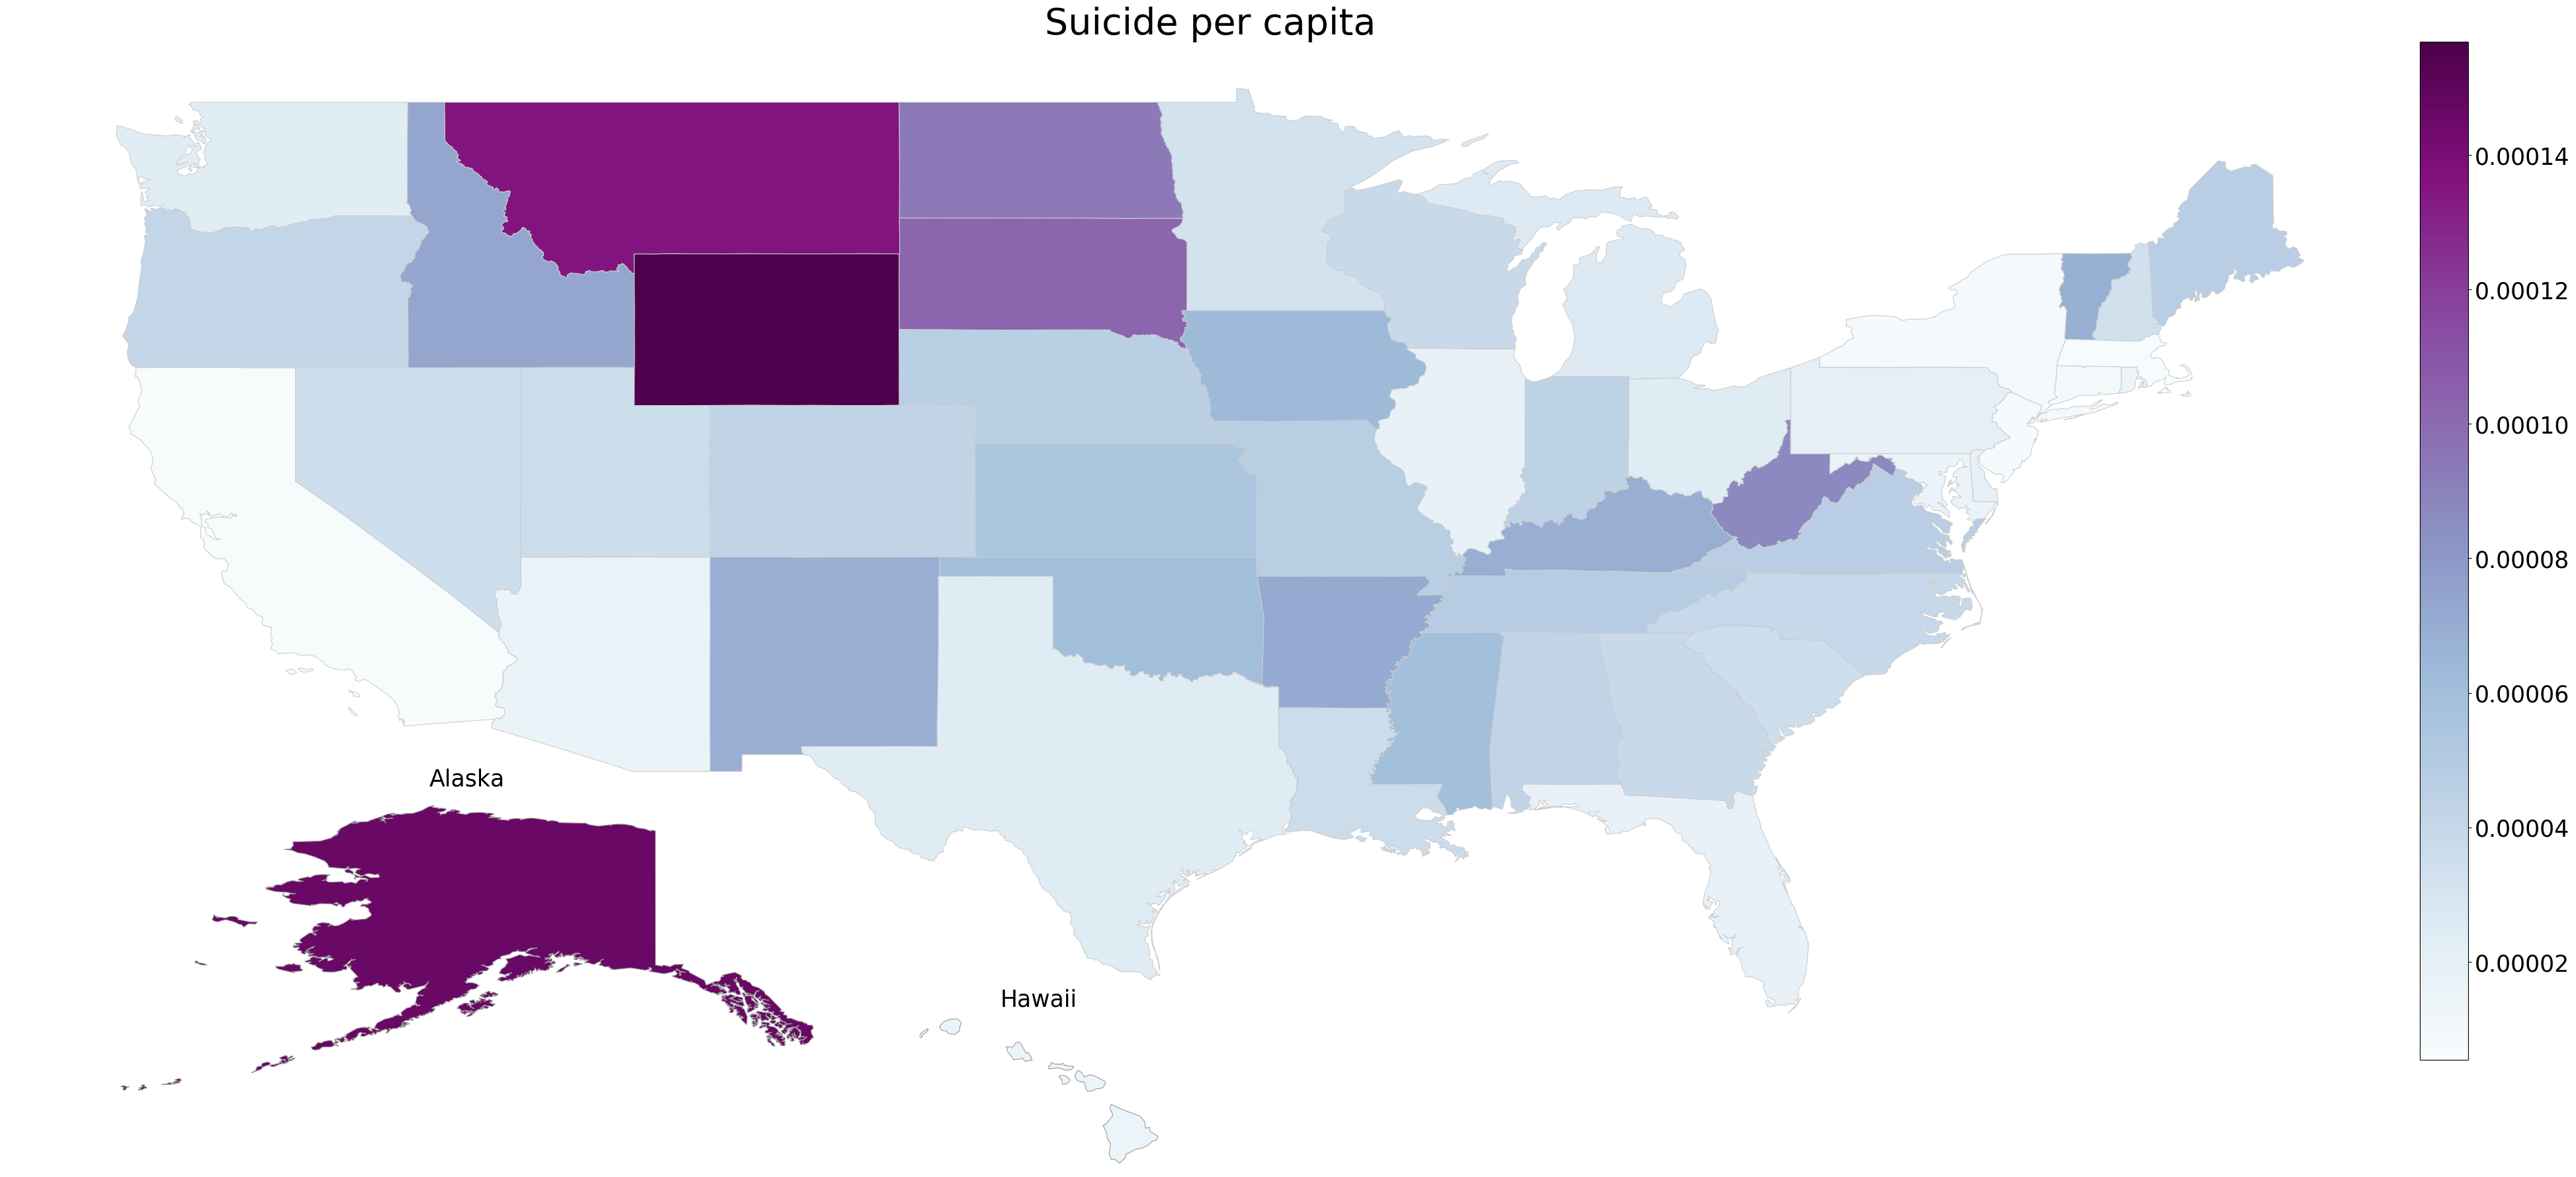

In [42]:
df_state_land['Suicide_per_capita'] = df_state_land['Suicide']/df_state_land['Population_Size']
df_state_Alaska['Suicide_per_capita'] = df_state_Alaska['Suicide']/df_state_Alaska['Population_Size']
df_state_Hawaii['Suicide_per_capita'] = df_state_Hawaii['Suicide']/df_state_Hawaii['Population_Size']
new_item = pd.DataFrame({'COLUMN_NAME':['Suicide_per_capita'], 'DESCRIPTION':['Suicide per capita']})
DATA_ELEMENT_DESCRIPTION = DATA_ELEMENT_DESCRIPTION.append(new_item, sort=False)


US_state_plot('Suicide_per_capita', 'BuPu')


(0, 6709031.721550715)

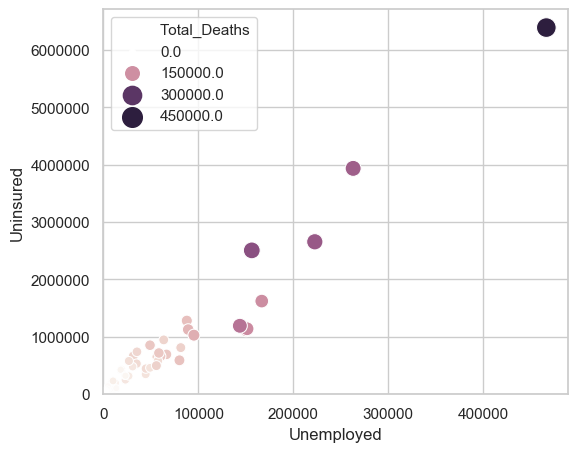

In [93]:
#Relationship between total death, being unmarried and being uninsured:
sns.set(style='whitegrid')
fig, ax = plt.subplots(1, figsize=(6, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.scatterplot(x='Unemployed', y='Uninsured', size='Total_Deaths', hue='Total_Deaths', 
                     sizes=(20, 200), palette=cmap, data=df_state)
ax.set_xlim(0)
ax.set_ylim(0)

Text(0, 0.5, 'Infant Mortality')

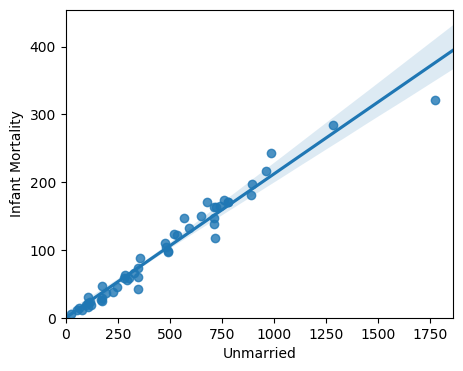

In [100]:
sns.reset_orig()
f, ax = plt.subplots(figsize=(5, 4))
ax = sns.regplot(x='Unmarried', y='Infant_Mortality', data=df_state)
ax.set(ylim=(0, None))
ax.set(xlim=(0, None))
ax.set_ylabel('Infant Mortality')